In [2]:
#importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# PDT - Análise Político-Eleitoral – SJCampos

## 1. Quantos eleitores tem SJCampos hoje?

In [3]:
qtd_eleitorado = pd.read_csv('../data/qtd_eleitor_mensal-zona_2024_1_sp_sao_jose_dos_campos.csv', low_memory=False, delimiter=';',encoding='latin-1')
qtd_eleitorado

,nr_ano,nr_mes,sg_uf,nr_zona,pc_eleitor_biometria,qt_eleitor,qt_eleitor_biometria,dt_carga
0,2024,1,SP,127,"0,9068",135934,123260,2024-02-01 14:13:58
1,2024,1,SP,282,"0,9022",78536,70853,2024-02-01 14:13:58
2,2024,1,SP,411,"0,9006",139329,125480,2024-02-01 14:13:58
3,2024,1,SP,412,"0,9015",179211,161565,2024-02-01 14:13:58


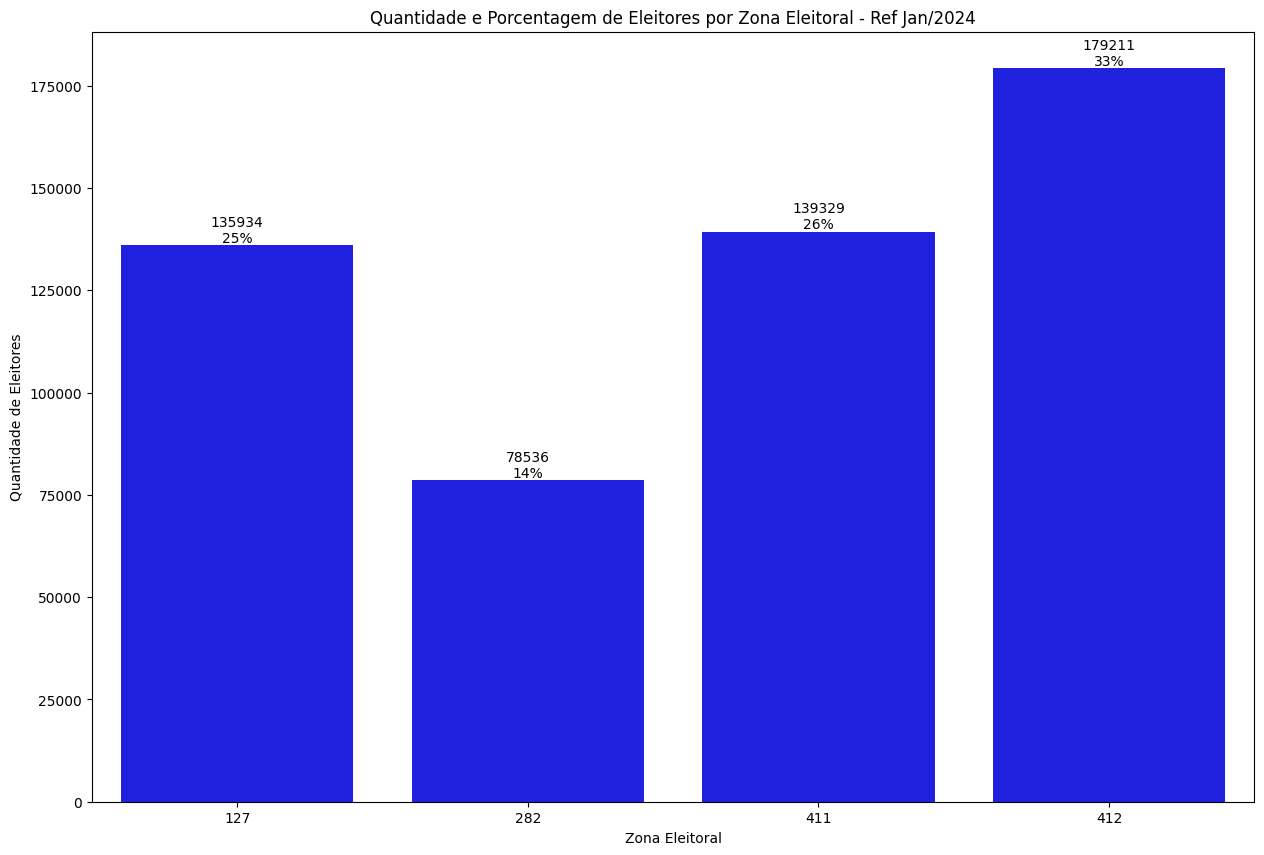

In [41]:
dados_agrupados = qtd_eleitorado.groupby('nr_zona')['qt_eleitor'].sum().reset_index()
dados_agrupados['porcentagem'] = (dados_agrupados['qt_eleitor'] / dados_agrupados['qt_eleitor'].sum()) * 100

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_eleitor', data=dados_agrupados, color='blue')

for index, (value, porcentagem) in enumerate(zip(dados_agrupados['qt_eleitor'], dados_agrupados['porcentagem'])):
    ax.text(index, value, f'{value}\n{int(porcentagem)}%', ha='center', va='bottom')

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Eleitores')
plt.title(f'Quantidade e Porcentagem de Eleitores por Zona Eleitoral - Ref Jan/2024')
plt.show()

In [5]:
perfil_eleitorado = pd.read_csv('../data/perfil_eleitor_mensal-zona_2024_1_sp_sao_jose_dos_campos.csv', low_memory=False, delimiter=';',encoding='latin-1')
perfil_eleitorado

,nr_ano,nr_mes,ds_pais_uf,nm_regiao,sg_uf,nr_zona,ds_estado_civil,ds_grau_instrucao,cd_grau_instrucao,pc_eleitor_biometria,qt_eleitor,qt_eleitor_biometria,dt_carga
0,2024,1,Brasil,SUDESTE,SP,127,DIVORCIADO,ENSINO MÉDIO INCOMPLETO,5,"0,9303",330,307,2024-02-01 14:13:58
1,2024,1,Brasil,SUDESTE,SP,127,VIÚVO,SUPERIOR COMPLETO,8,"0,968",968,937,2024-02-01 14:13:58
2,2024,1,Brasil,SUDESTE,SP,411,CASADO,ENSINO MÉDIO INCOMPLETO,5,"0,9468",3198,3028,2024-02-01 14:13:58
3,2024,1,Brasil,SUDESTE,SP,411,SOLTEIRO,LÊ E ESCREVE,2,"0,8387",465,390,2024-02-01 14:13:58
4,2024,1,Brasil,SUDESTE,SP,412,SOLTEIRO,ENSINO MÉDIO INCOMPLETO,5,"0,6635",13939,9248,2024-02-01 14:13:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2024,1,Brasil,SUDESTE,SP,412,DIVORCIADO,SUPERIOR COMPLETO,8,"0,9764",2961,2891,2024-02-01 14:13:58
157,2024,1,Brasil,SUDESTE,SP,412,SOLTEIRO,ENSINO MÉDIO COMPLETO,6,"0,8125",36270,29469,2024-02-01 14:13:58
158,2024,1,Brasil,SUDESTE,SP,282,CASADO,ENSINO MÉDIO INCOMPLETO,5,"0,9569",2226,2130,2024-02-01 14:13:58
159,2024,1,Brasil,SUDESTE,SP,411,SEPARADO JUDICIALMENTE,ENSINO FUNDAMENTAL INCOMPLETO,3,"0,9683",567,549,2024-02-01 14:13:58


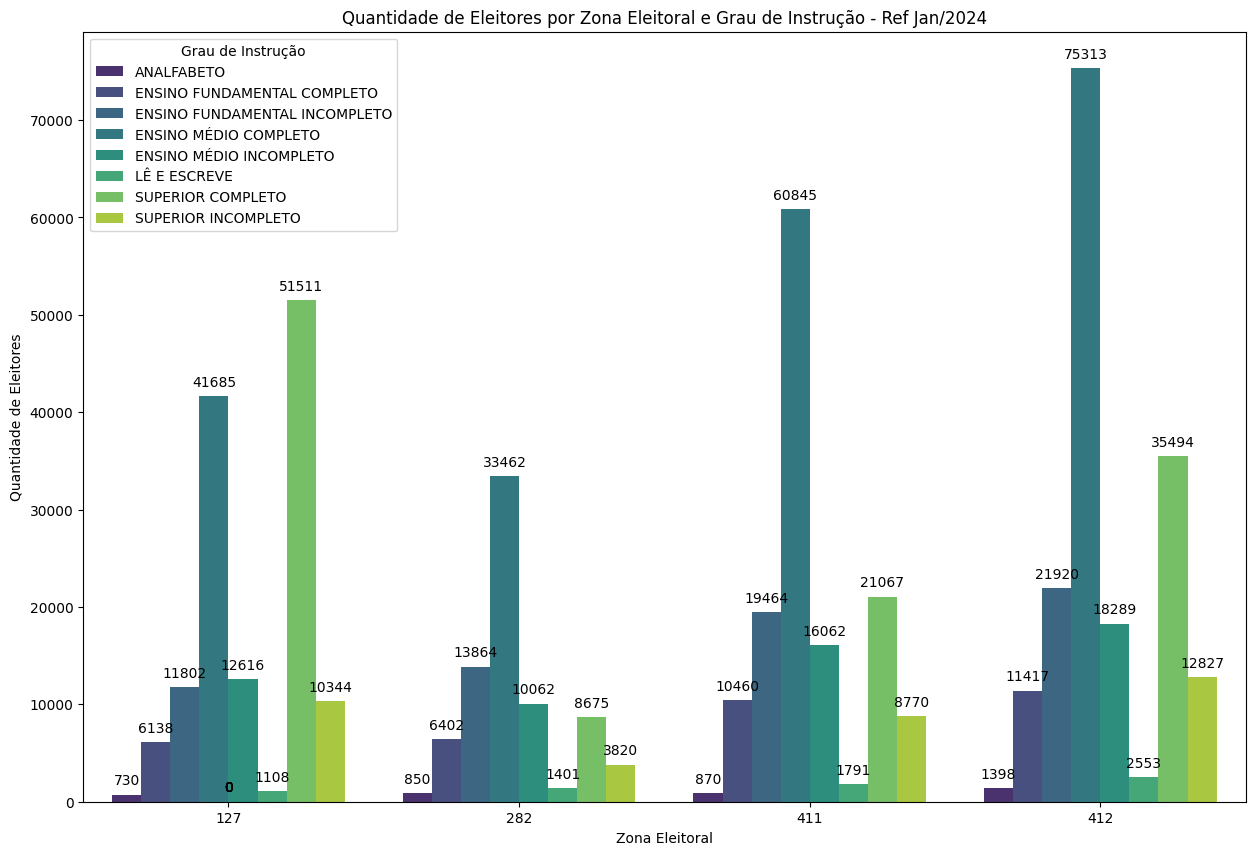

In [6]:
dados_agrupados = perfil_eleitorado.groupby(['nr_zona', 'ds_grau_instrucao'])['qt_eleitor'].sum().reset_index()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_eleitor', hue='ds_grau_instrucao', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Eleitores')
plt.title('Quantidade de Eleitores por Zona Eleitoral e Grau de Instrução - Ref Jan/2024')
plt.legend(title='Grau de Instrução', loc='upper left')
plt.show()

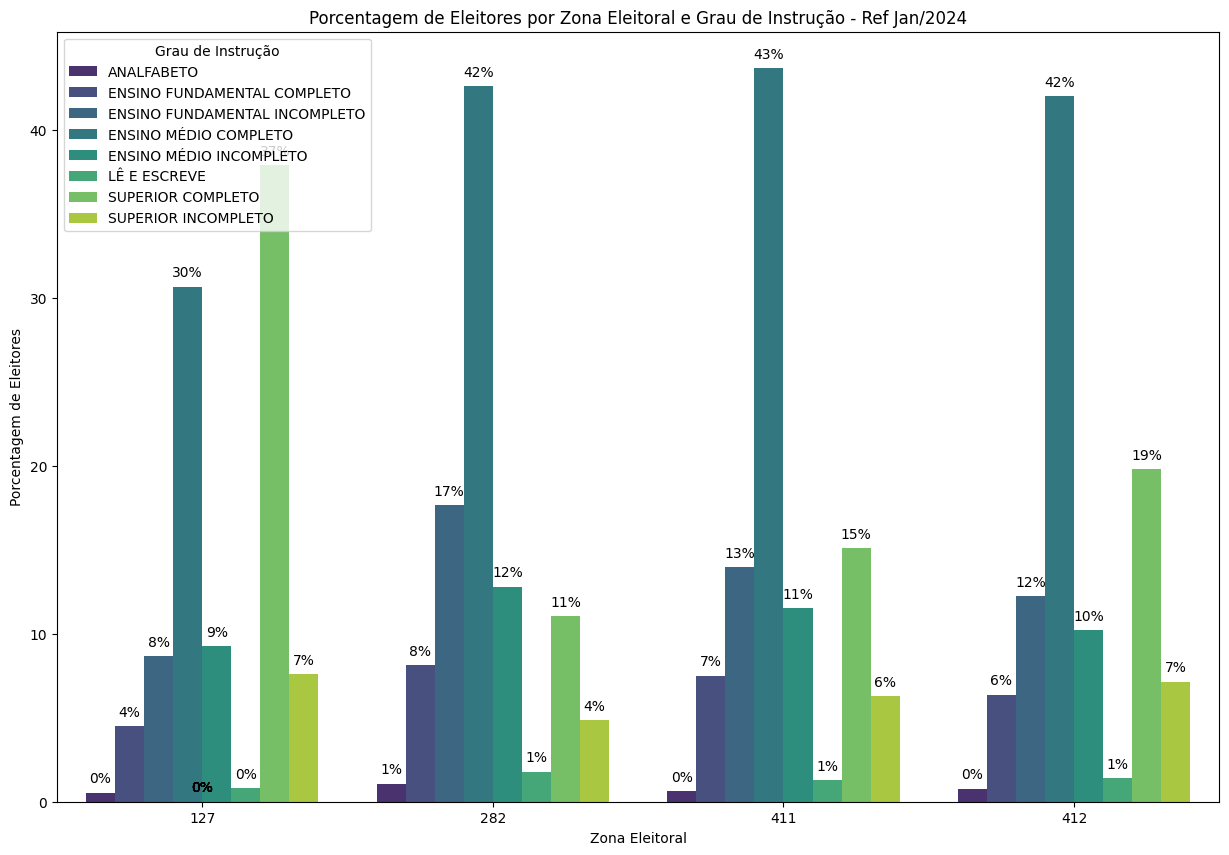

In [43]:
dados_agrupados = perfil_eleitorado.groupby(['nr_zona', 'ds_grau_instrucao'])['qt_eleitor'].sum().reset_index()
dados_agrupados['porcentagem'] = (dados_agrupados['qt_eleitor'] / dados_agrupados.groupby('nr_zona')['qt_eleitor'].transform('sum')) * 100

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='porcentagem', hue='ds_grau_instrucao', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Porcentagem de Eleitores')
plt.title('Porcentagem de Eleitores por Zona Eleitoral e Grau de Instrução - Ref Jan/2024')
plt.legend(title='Grau de Instrução', loc='upper left')
plt.show()

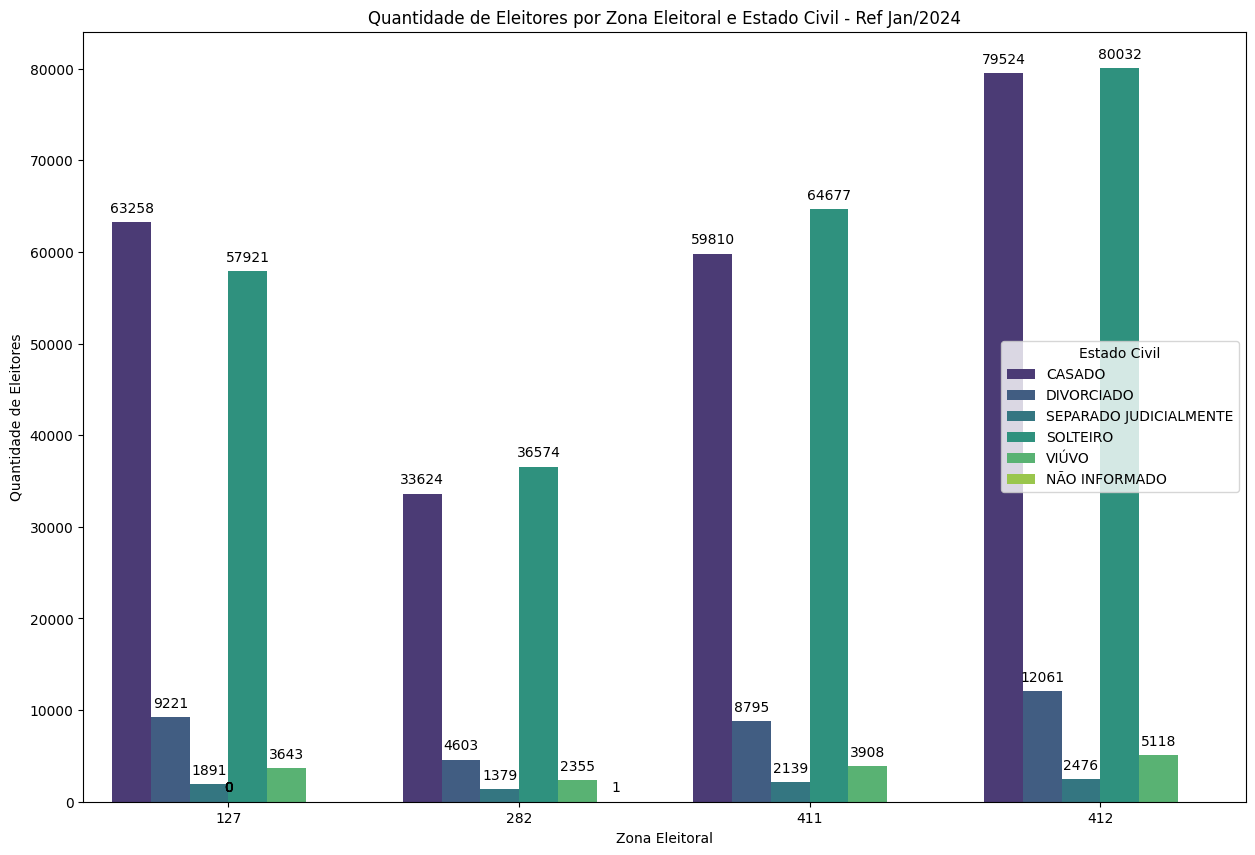

In [7]:
dados_agrupados = perfil_eleitorado.groupby(['nr_zona', 'ds_estado_civil'])['qt_eleitor'].sum().reset_index()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_eleitor', hue='ds_estado_civil', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Eleitores')
plt.title('Quantidade de Eleitores por Zona Eleitoral e Estado Civil - Ref Jan/2024')
plt.legend(title='Estado Civil', loc='center right')
plt.show()

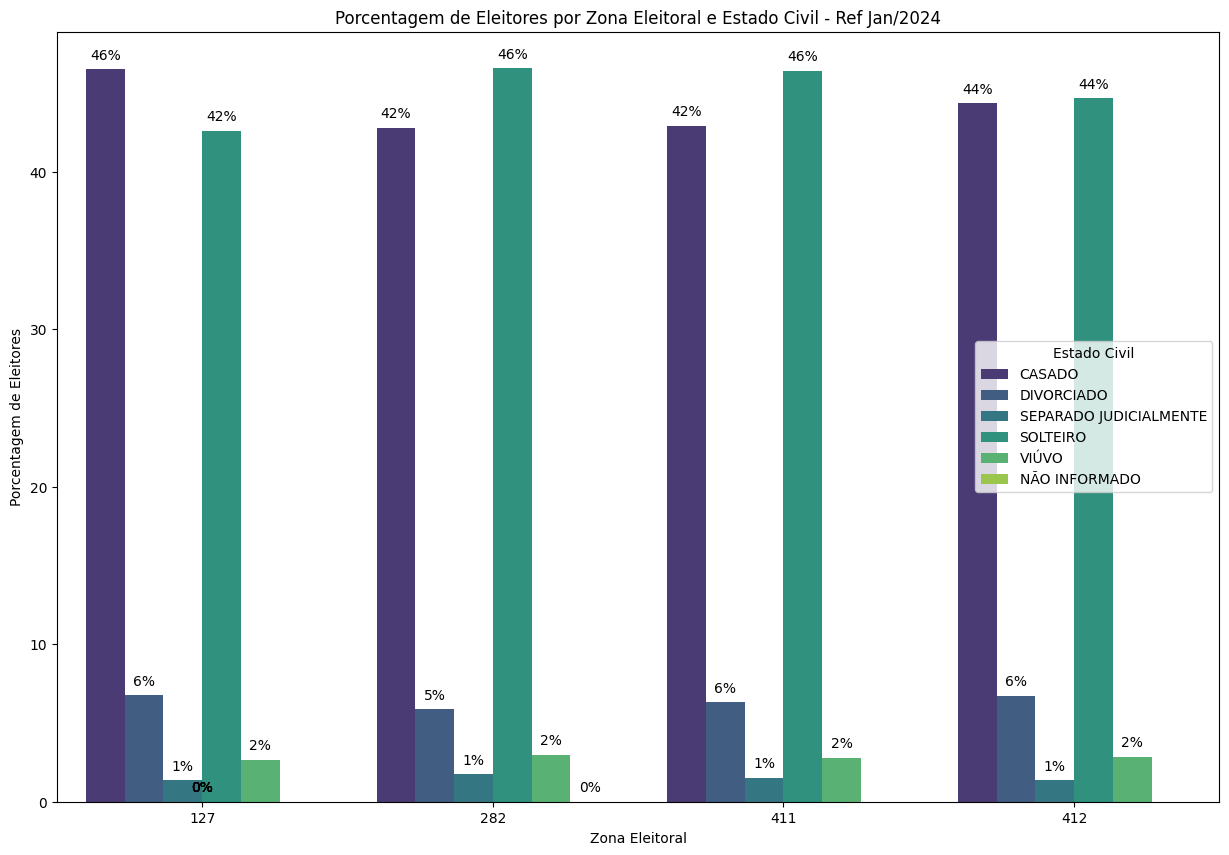

In [44]:
dados_agrupados = perfil_eleitorado.groupby(['nr_zona', 'ds_estado_civil'])['qt_eleitor'].sum().reset_index()
dados_agrupados['porcentagem'] = (dados_agrupados['qt_eleitor'] / dados_agrupados.groupby('nr_zona')['qt_eleitor'].transform('sum')) * 100

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='porcentagem', hue='ds_estado_civil', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Porcentagem de Eleitores')
plt.title('Porcentagem de Eleitores por Zona Eleitoral e Estado Civil - Ref Jan/2024')
plt.legend(title='Estado Civil', loc='center right')
plt.show()

## 2. Qual é o quociente eleitoral estimado p/ 2024 (vereadores)?

### Quociente Eleitoral em 2020

In [8]:
quociente2020 = pd.read_csv('../data/quociente_eleitoral-municipio_2020_sp_sao_jose_dos_campos.csv', low_memory=False, delimiter=';',encoding='latin-1')
quociente2020sjc = quociente2020.loc[quociente2020['nm_municipio_tse'] == "SÃO JOSÉ DOS CAMPOS"]

votos_validos_2020 = quociente2020sjc['qt_votos_validos_qe'].iloc[0]
assentos = quociente2020sjc['qt_vagas_qe'].iloc[0]
qe_2020 = quociente2020sjc['vr_quociente_eleitoral'].iloc[0]

print(f"QE 2020 = votos_validos / num_assentos")
print(f"QE 2020 = {votos_validos_2020} / {assentos} = {qe_2020}")


QE 2020 = votos_validos / num_assentos
QE 2020 = 345932 / 21 = 16473


### Estimativa para 2024, utilizando a quantidade de votos válidos para presidente em 2022

In [9]:
presidente2022 = pd.read_csv('../data/votacao_candidato-zona_2022_sp_sao_jose_dos_campos_segundoturno.csv', low_memory=False, delimiter=';',encoding='latin-1')

dados_agrupados = presidente2022.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()
total_votos_validos_2022_sjc = dados_agrupados['qt_votos_nom_validos'].sum()

print(f"QE 2024 = votos_validos / num_assentos")
print(f"QE 2024 = {total_votos_validos_2022_sjc} / 21 = {round(total_votos_validos_2022_sjc / 21)}")

QE 2024 = votos_validos / num_assentos
QE 2024 = 427611 / 21 = 20362


### Espectro de votação por Partidos

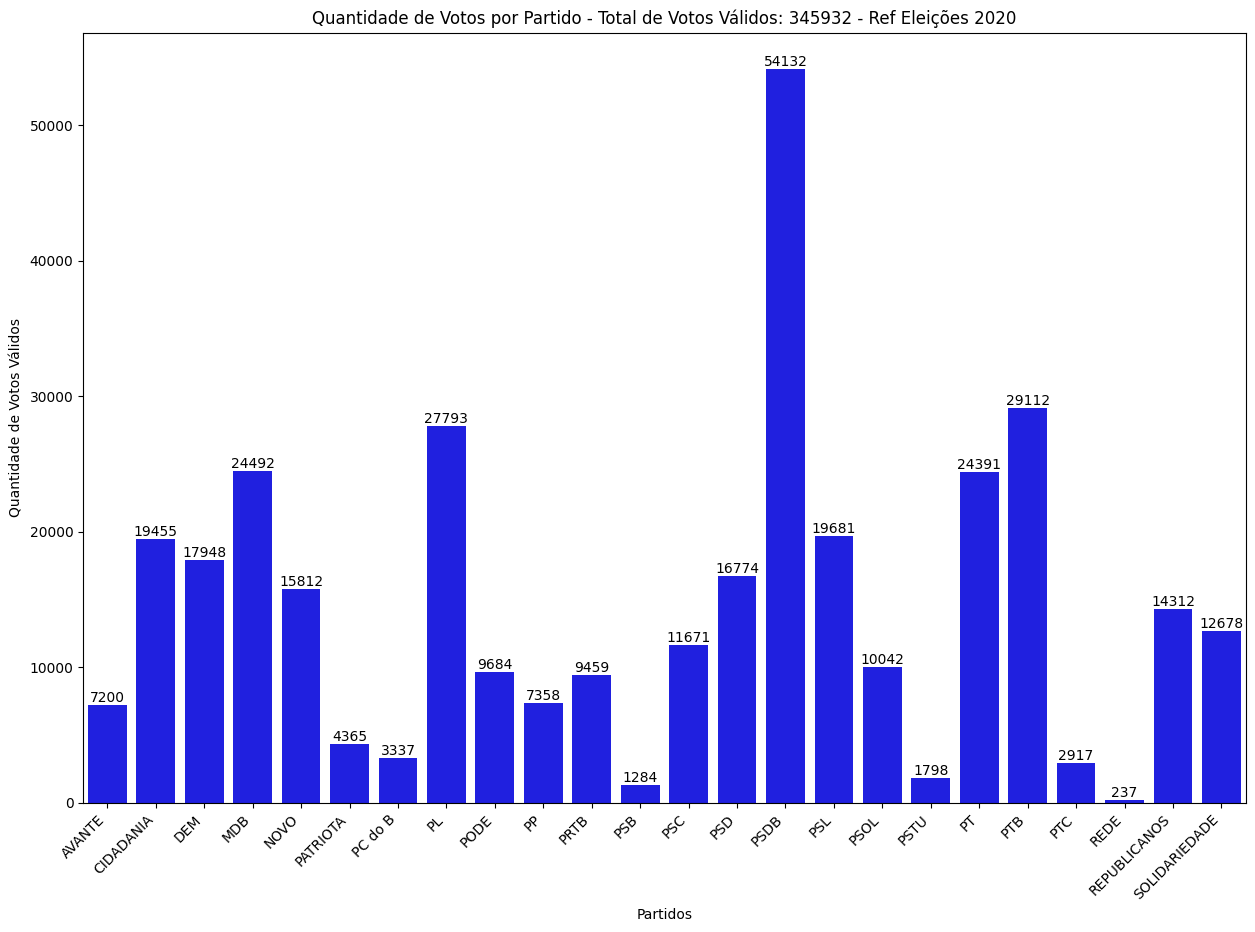

In [10]:
dados_agrupados = quociente2020sjc.groupby('tx_legenda_tot')['qt_votos_coligacao_qp'].sum().reset_index()

total_votos_validos = dados_agrupados['qt_votos_coligacao_qp'].sum()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='tx_legenda_tot', y='qt_votos_coligacao_qp', data=dados_agrupados, color='blue')

for index, value in enumerate(dados_agrupados['qt_votos_coligacao_qp']):
    ax.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Partidos')
plt.ylabel('Quantidade de Votos Válidos')
plt.title(f'Quantidade de Votos por Partido - Total de Votos Válidos: {total_votos_validos} - Ref Eleições 2020')
plt.xticks(rotation=45, ha='right')
plt.show()

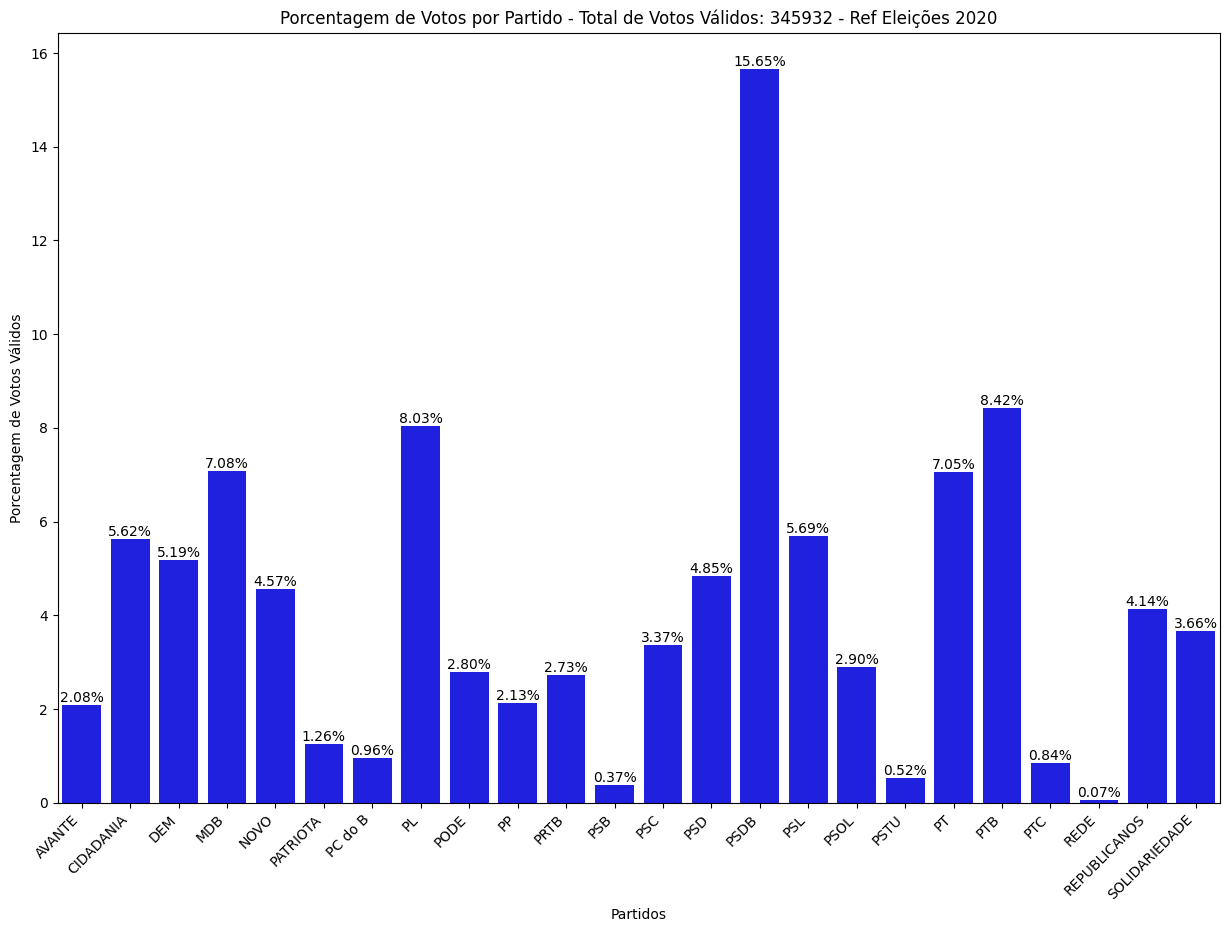

In [46]:
dados_agrupados = quociente2020sjc.groupby('tx_legenda_tot')['qt_votos_coligacao_qp'].sum().reset_index()
total_votos_validos = dados_agrupados['qt_votos_coligacao_qp'].sum()
dados_agrupados['porcentagem'] = (dados_agrupados['qt_votos_coligacao_qp'] / total_votos_validos) * 100

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='tx_legenda_tot', y='porcentagem', data=dados_agrupados, color='blue')

for index, value in enumerate(dados_agrupados['porcentagem']):
    ax.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.xlabel('Partidos')
plt.ylabel('Porcentagem de Votos Válidos')
plt.title(f'Porcentagem de Votos por Partido - Total de Votos Válidos: {total_votos_validos} - Ref Eleições 2020')
plt.xticks(rotation=45, ha='right')
plt.show()

## Espectro de votação p/ Presidente 2Turno

In [11]:

presidente2022

,sg_uf,nr_zona,cd_cargo,ds_cargo,nr_candidato,nm_candidato,nm_urna_candidato,sg_partido,ds_composicao_coligacao,nr_turno,ds_sit_totalizacao,dt_ult_totalizacao,sg_ue,sq_candidato,nm_tipo_destinacao_votos,sq_eleicao_divulga,pc_votos_validos,qt_votos_nom_validos,qt_votos_concorrentes
0,SP,127,1,Presidente,22,JAIR MESSIAS BOLSONARO,JAIR BOLSONARO,PL,PP / REPUBLICANOS / PL,2,Não Eleito,2022-10-31 00:28:52,BR,280001618036,Válido,2040602022,"0,6359",69724,109643
1,SP,127,1,Presidente,13,LUIZ INÁCIO LULA DA SILVA,LULA,PT,(PT/PC do B/PV) / SOLIDARIEDADE / (PSOL/REDE) ...,2,Eleito,2022-10-31 00:28:52,BR,280001607829,Válido,2040602022,"0,3641",39919,109643
2,SP,282,1,Presidente,22,JAIR MESSIAS BOLSONARO,JAIR BOLSONARO,PL,PP / REPUBLICANOS / PL,2,Não Eleito,2022-10-31 00:28:52,BR,280001618036,Válido,2040602022,"0,605",38075,62937
3,SP,282,1,Presidente,13,LUIZ INÁCIO LULA DA SILVA,LULA,PT,(PT/PC do B/PV) / SOLIDARIEDADE / (PSOL/REDE) ...,2,Eleito,2022-10-31 00:28:52,BR,280001607829,Válido,2040602022,"0,395",24862,62937
4,SP,411,1,Presidente,22,JAIR MESSIAS BOLSONARO,JAIR BOLSONARO,PL,PP / REPUBLICANOS / PL,2,Não Eleito,2022-10-31 00:28:52,BR,280001618036,Válido,2040602022,"0,5939",65803,110789
5,SP,411,1,Presidente,13,LUIZ INÁCIO LULA DA SILVA,LULA,PT,(PT/PC do B/PV) / SOLIDARIEDADE / (PSOL/REDE) ...,2,Eleito,2022-10-31 00:28:52,BR,280001607829,Válido,2040602022,"0,4061",44986,110789
6,SP,412,1,Presidente,22,JAIR MESSIAS BOLSONARO,JAIR BOLSONARO,PL,PP / REPUBLICANOS / PL,2,Não Eleito,2022-10-31 00:28:52,BR,280001618036,Válido,2040602022,"0,6518",94013,144242
7,SP,412,1,Presidente,13,LUIZ INÁCIO LULA DA SILVA,LULA,PT,(PT/PC do B/PV) / SOLIDARIEDADE / (PSOL/REDE) ...,2,Eleito,2022-10-31 00:28:52,BR,280001607829,Válido,2040602022,"0,3482",50229,144242


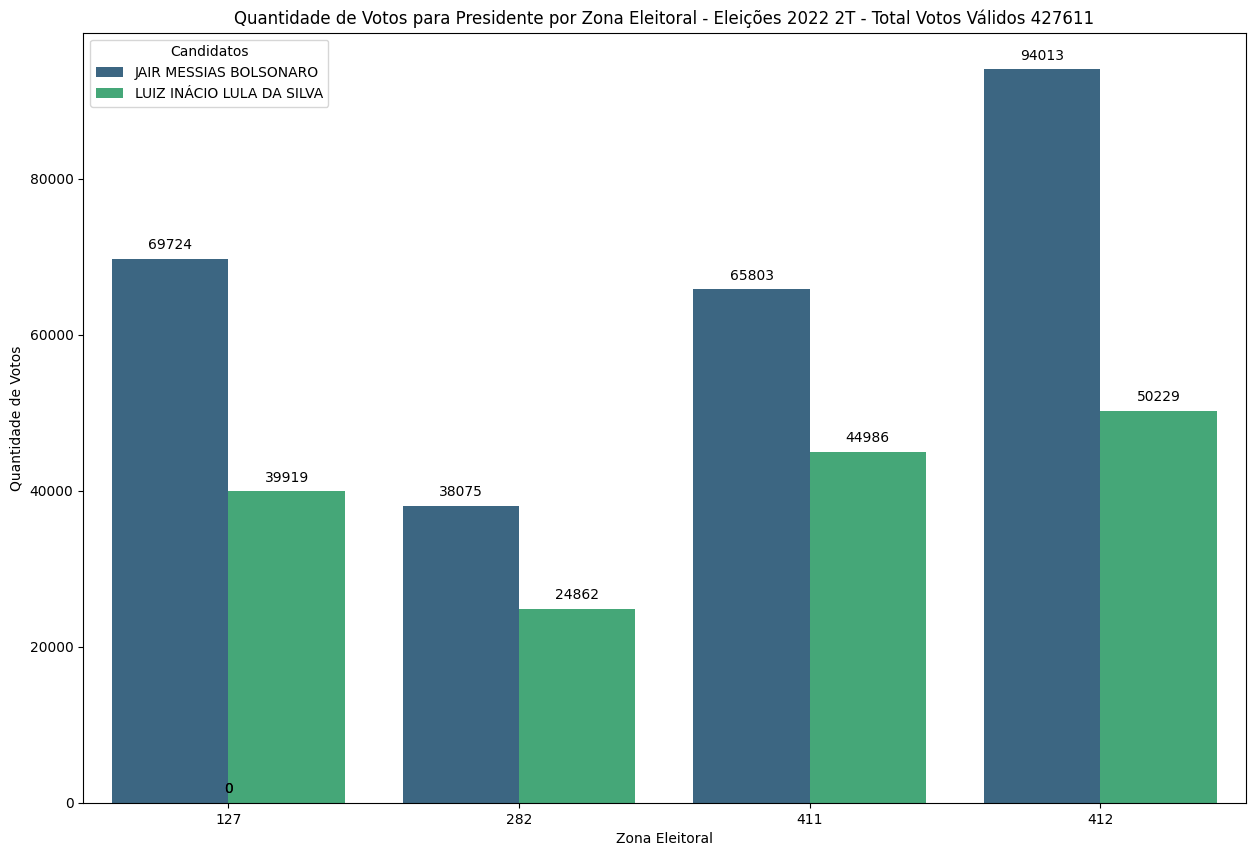

In [12]:
dados_agrupados = presidente2022.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()

total_votos_validos = dados_agrupados['qt_votos_nom_validos'].sum()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_votos_nom_validos', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Votos')
plt.title(f'Quantidade de Votos para Presidente por Zona Eleitoral - Eleições 2022 2T - Total Votos Válidos {total_votos_validos}')
plt.legend(title='Candidatos', loc='upper left')
plt.show()

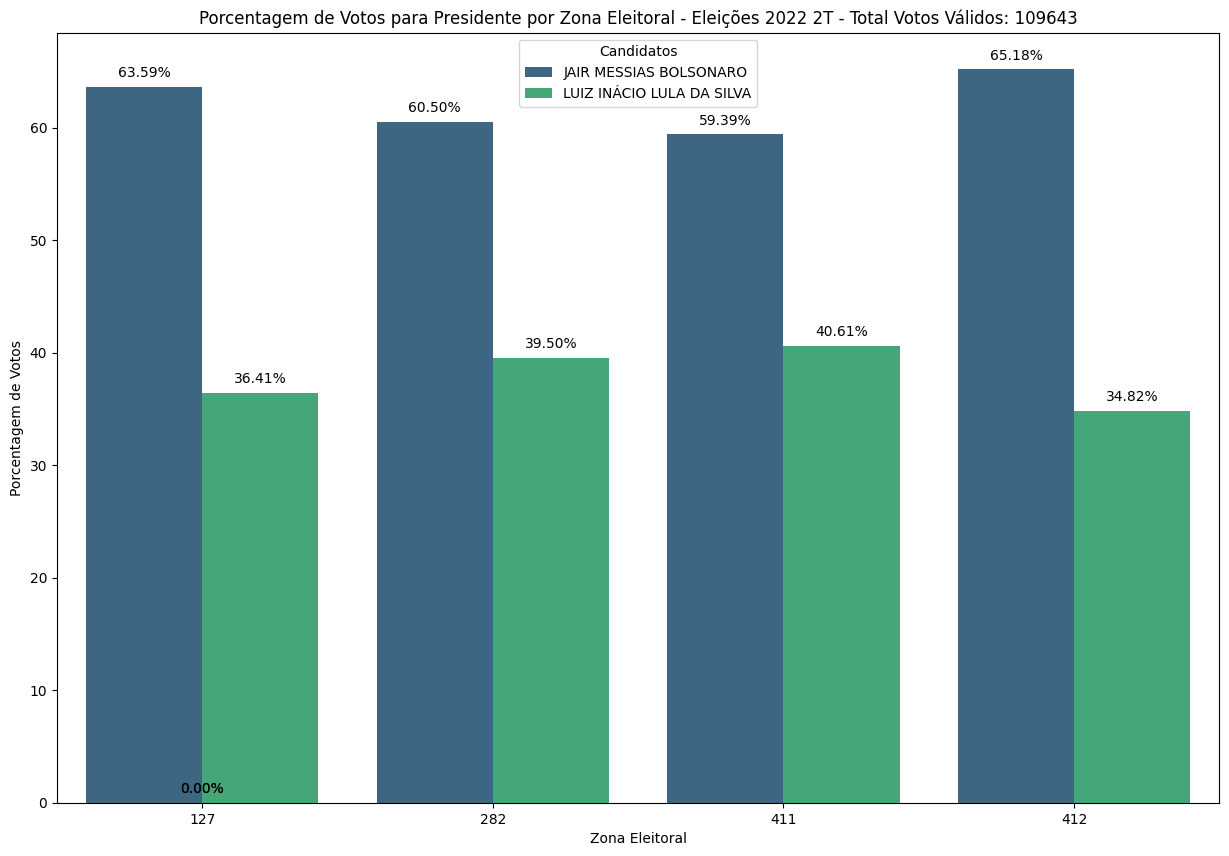

In [53]:
total_votos_validos = dados_agrupados.groupby('nr_zona')['qt_votos_nom_validos'].transform('sum')
dados_agrupados['porcentagem'] = (dados_agrupados['qt_votos_nom_validos'] / total_votos_validos) * 100

plt.figure(figsize=(15, 10))

ax = sns.barplot(x='nr_zona', y='porcentagem', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                (x, height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Porcentagem de Votos')
plt.title(f'Porcentagem de Votos para Presidente por Zona Eleitoral - Eleições 2022 2T - Total Votos Válidos: {total_votos_validos.iloc[0]}')
plt.legend(title='Candidatos', loc='upper center')
plt.show()

### Resultados Eleições Municipais 2020 em São José dos Campos

In [13]:
sjc2020 = pd.read_csv('../data/votacao_candidato-zona_2020_sp_sao_jose_dos_campos.csv', low_memory=False, delimiter=';',encoding='latin-1')
prefeito2020 = sjc2020.loc[sjc2020['ds_cargo'] == "Prefeito"]

selecao_prefeitos = ['FELICIO RAMUTH', 'ELIANE NIKOLUK SCACHETTI', 'WAGNER OCIMAR BALIEIRO', 'RENATA LEMES DE PAIVA MENDES DA COSTA', 'ANDERSON ALVES SENE', 'AGLIBERTO DO SOCORRO CHAGAS']

prefeito2020 = prefeito2020[prefeito2020['nm_candidato'].isin(selecao_prefeitos)]

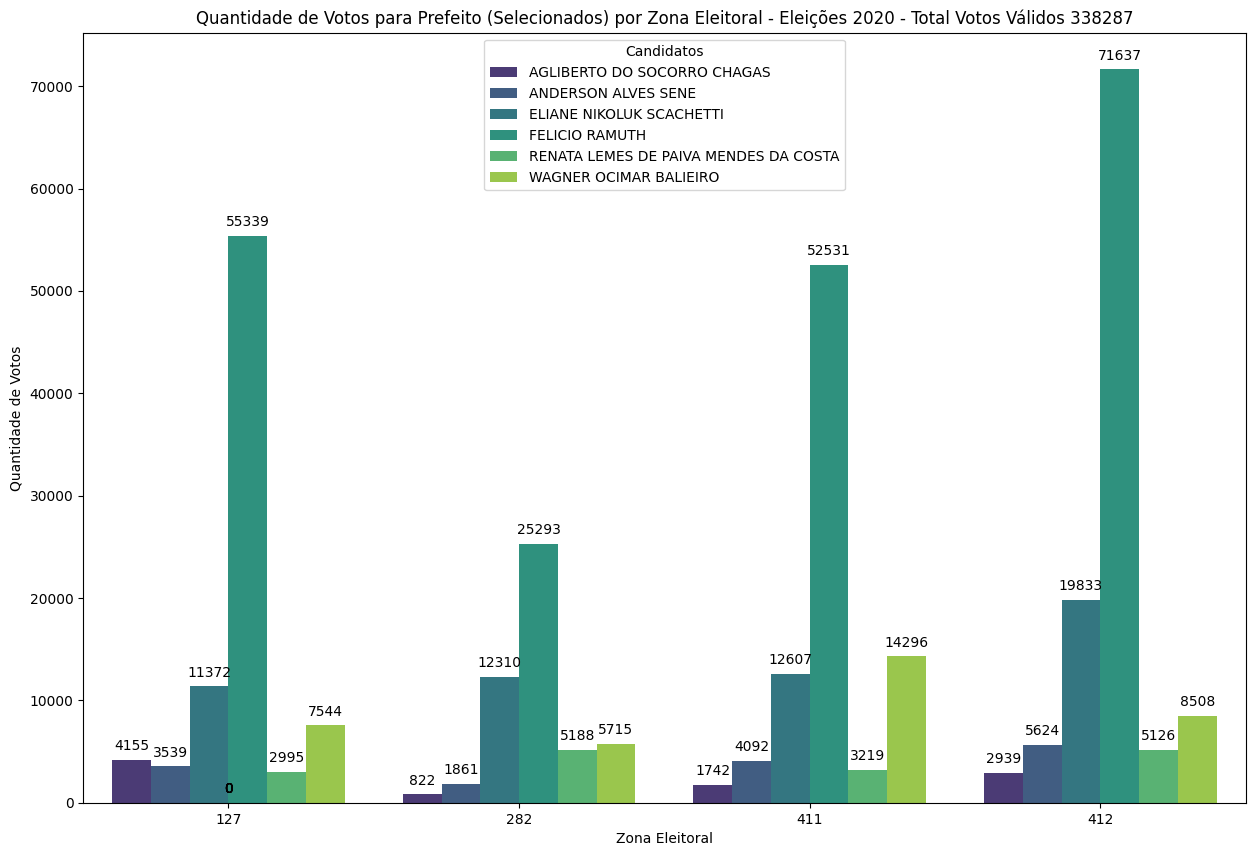

In [14]:
dados_agrupados = prefeito2020.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()

total_votos_validos = dados_agrupados['qt_votos_nom_validos'].sum()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_votos_nom_validos', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Votos')
plt.title(f'Quantidade de Votos para Prefeito (Selecionados) por Zona Eleitoral - Eleições 2020 - Total Votos Válidos {total_votos_validos}')
plt.legend(title='Candidatos', loc='upper center')
plt.show()

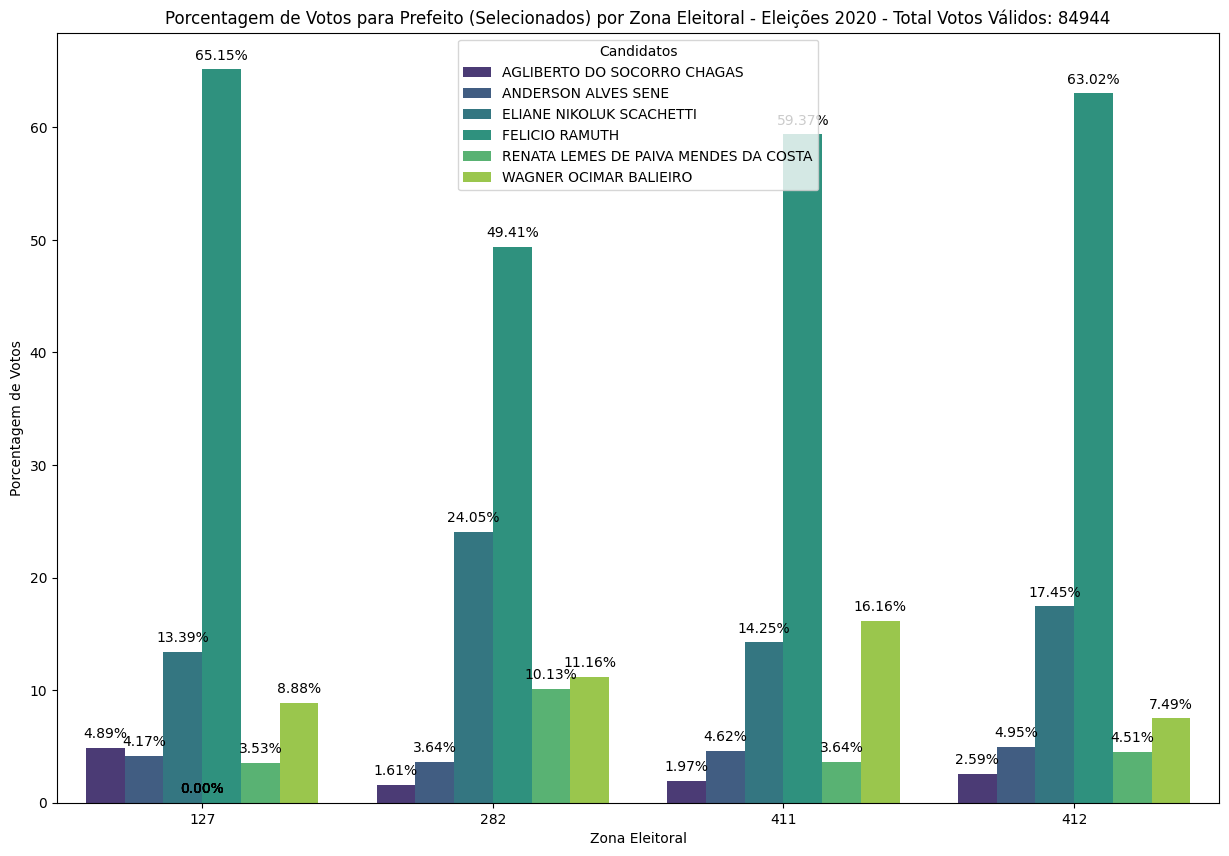

In [59]:
dados_agrupados = prefeito2020.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()
total_votos_validos = dados_agrupados.groupby('nr_zona')['qt_votos_nom_validos'].transform('sum')
dados_agrupados['porcentagem'] = (dados_agrupados['qt_votos_nom_validos'] / total_votos_validos) * 100

plt.figure(figsize=(15, 10))

ax = sns.barplot(x='nr_zona', y='porcentagem', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                (x, height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Porcentagem de Votos')
plt.title(f'Porcentagem de Votos para Prefeito (Selecionados) por Zona Eleitoral - Eleições 2020 - Total Votos Válidos: {total_votos_validos.iloc[0]}')
plt.legend(title='Candidatos', loc='upper center')
plt.show()

In [15]:
vereador2020 = sjc2020.loc[sjc2020['ds_cargo'] == "Vereador"]
vereador2020 = vereador2020.loc[vereador2020['ds_sit_totalizacao'] == "Eleito"]

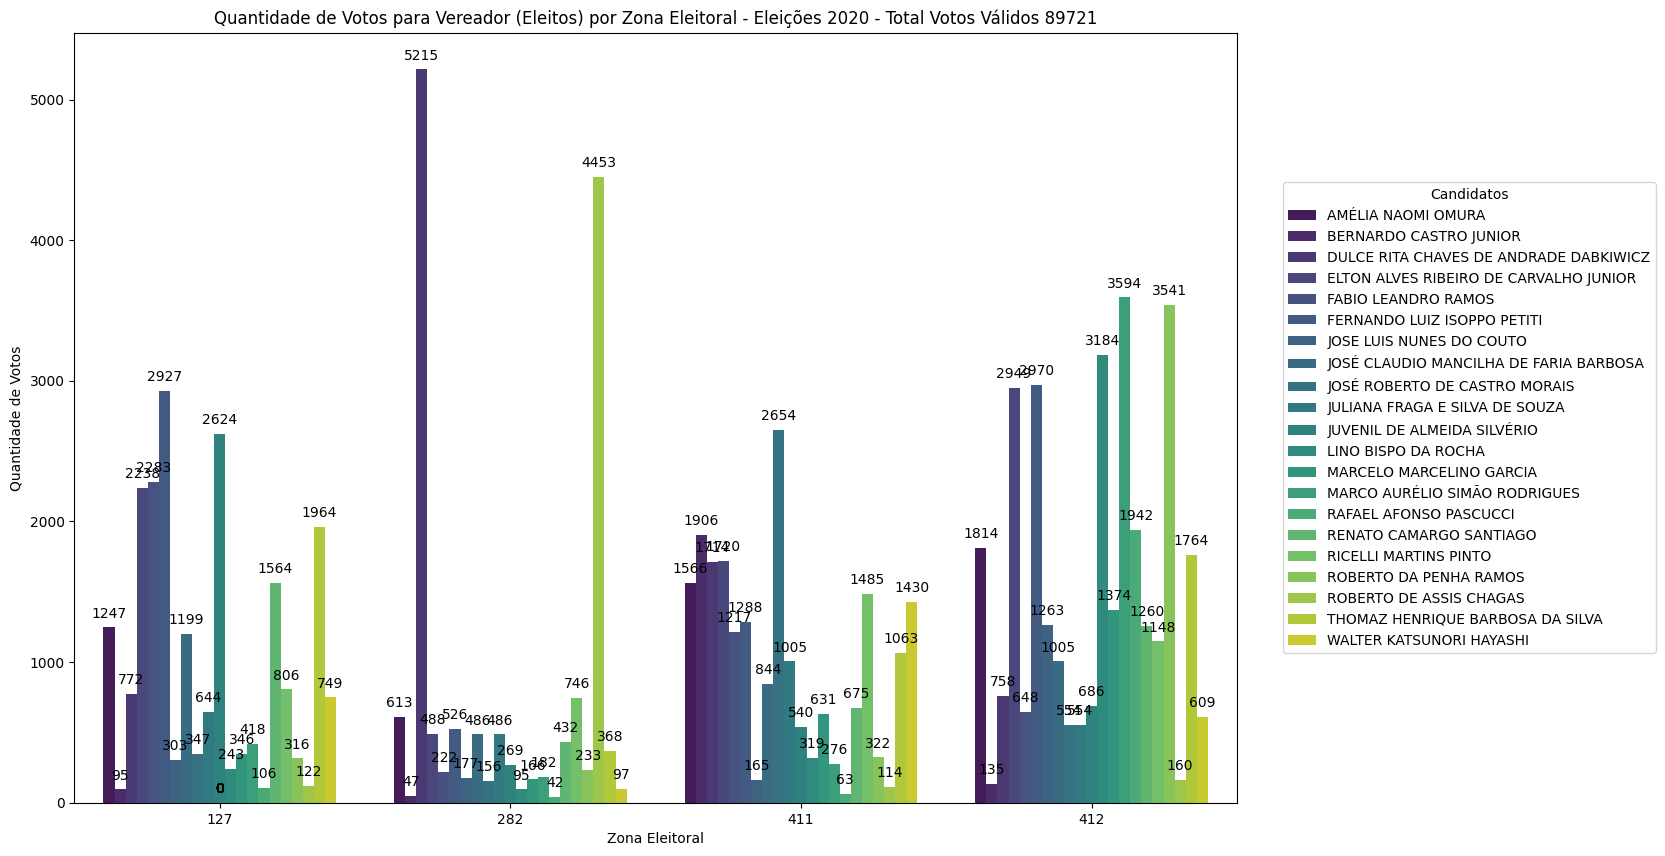

In [16]:
dados_agrupados = vereador2020.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()

total_votos_validos = dados_agrupados['qt_votos_nom_validos'].sum()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_votos_nom_validos', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Votos')
plt.title(f'Quantidade de Votos para Vereador (Eleitos) por Zona Eleitoral - Eleições 2020 - Total Votos Válidos {total_votos_validos}')
plt.legend(title='Candidatos', loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

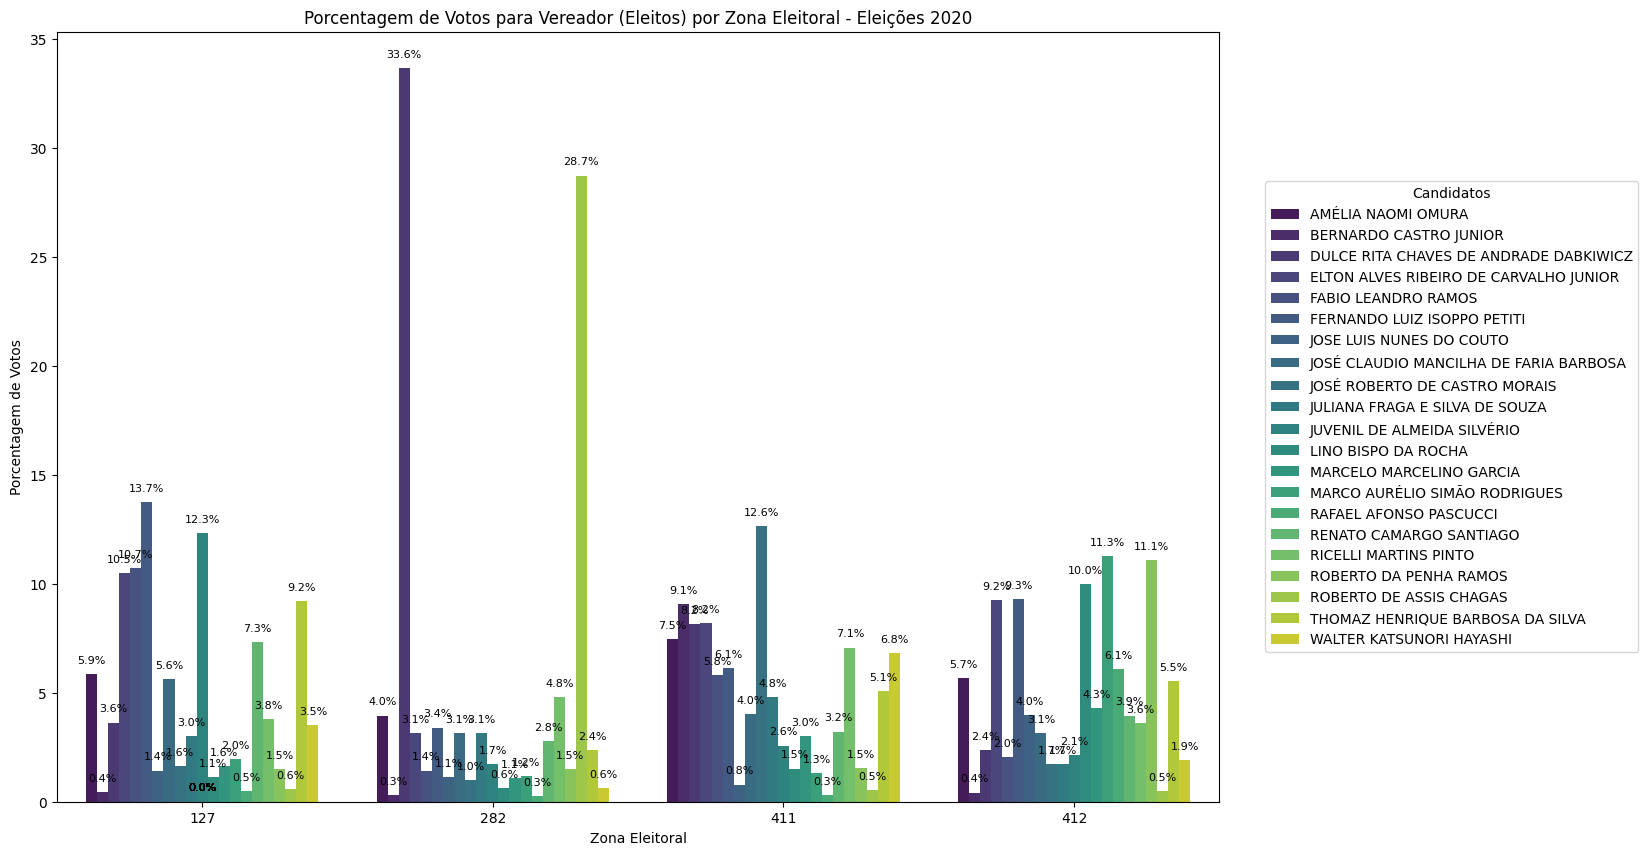

In [57]:
dados_agrupados = vereador2020.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()
dados_agrupados['porcentagem'] = (dados_agrupados['qt_votos_nom_validos'] / dados_agrupados.groupby('nr_zona')['qt_votos_nom_validos'].transform('sum')) * 100

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='porcentagem', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Porcentagem de Votos')
plt.title(f'Porcentagem de Votos para Vereador (Eleitos) por Zona Eleitoral - Eleições 2020')
plt.legend(title='Candidatos', loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

### Resultados Eleições Municipais 2016 em São José dos Campos

In [18]:
sjc2016 = pd.read_csv('../data/votacao_candidato-zona_2016_sp_sao_jose_dos_campos.csv', low_memory=False, delimiter=';',encoding='latin-1')
prefeito2016 = sjc2016.loc[sjc2016['ds_cargo'] == "Prefeito"]
prefeito2016

,sg_uf,nr_zona,nm_municipio,cd_cargo,ds_cargo,nr_candidato,nm_candidato,nm_urna_candidato,sg_partido,ds_composicao_coligacao,nr_turno,ds_sit_totalizacao,dt_ult_totalizacao,sg_ue,sq_candidato,nm_tipo_destinacao_votos,sq_eleicao_divulga,pc_votos_validos,qt_votos_nom_validos,qt_votos_concorrentes
0,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,45,FELÍCIO RAMUTH,FELÍCIO RAMUTH,PSDB,PSDB / PSB / PSC / PROS / PMDB / PTB / PT do B,1,Eleito,2016-10-02 22:11:12,70998,250000038921,NaN,2,NaN,59197,NaN
1,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,13,CARLOS JOSE DE ALMEIDA,CARLINHOS ALMEIDA,PT,PP / PDT / PT / PPS / PSDC / PRTB / PRP / PSD ...,1,Não Eleito,2016-10-02 22:11:12,70998,250000025660,NaN,2,NaN,13703,NaN
2,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,10,SHAKESPEARE VIANA CARVALHO,SHAKESPEARE,PRB,PRB / PR / DEM / PHS / PMB / PTC,1,Não Eleito,2016-10-02 22:11:12,70998,250000051170,NaN,2,NaN,7965,NaN
3,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,43,CLAUDE MARY DE MOURA,CLAUDE MOURA,PV,PV / PTN,1,Não Eleito,2016-10-02 22:11:12,70998,250000020612,NaN,2,NaN,2354,NaN
4,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,16,ANTONIO DONIZETE FERREIRA,TONINHO FERREIRA,PSTU,PSTU / PSOL,1,Não Eleito,2016-10-02 22:11:12,70998,250000072522,NaN,2,NaN,952,NaN
5,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,51,LUIZ CARLOS DE OLIVEIRA,LUIZ CARLOS,PEN,PEN / PSL,1,Não Eleito,2016-10-02 22:11:12,70998,250000080047,NaN,2,NaN,276,NaN
386,SP,282,SÃO JOSÉ DOS CAMPOS,11,Prefeito,45,FELÍCIO RAMUTH,FELÍCIO RAMUTH,PSDB,PSDB / PSB / PSC / PROS / PMDB / PTB / PT do B,1,Eleito,2016-10-02 22:11:12,70998,250000038921,NaN,2,NaN,31407,NaN
387,SP,282,SÃO JOSÉ DOS CAMPOS,11,Prefeito,13,CARLOS JOSE DE ALMEIDA,CARLINHOS ALMEIDA,PT,PP / PDT / PT / PPS / PSDC / PRTB / PRP / PSD ...,1,Não Eleito,2016-10-02 22:11:12,70998,250000025660,NaN,2,NaN,15573,NaN
388,SP,282,SÃO JOSÉ DOS CAMPOS,11,Prefeito,10,SHAKESPEARE VIANA CARVALHO,SHAKESPEARE,PRB,PRB / PR / DEM / PHS / PMB / PTC,1,Não Eleito,2016-10-02 22:11:12,70998,250000051170,NaN,2,NaN,6902,NaN
389,SP,282,SÃO JOSÉ DOS CAMPOS,11,Prefeito,43,CLAUDE MARY DE MOURA,CLAUDE MOURA,PV,PV / PTN,1,Não Eleito,2016-10-02 22:11:12,70998,250000020612,NaN,2,NaN,1293,NaN


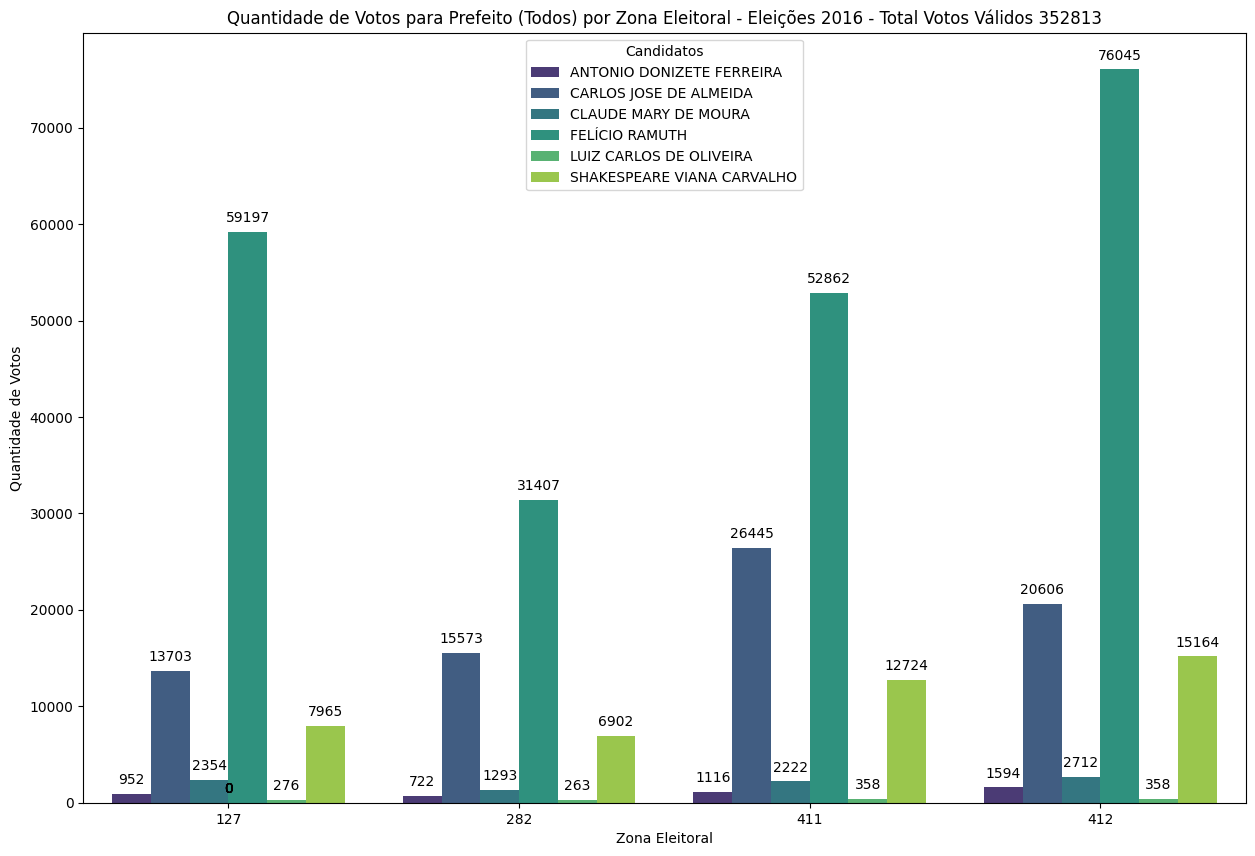

In [19]:
dados_agrupados = prefeito2016.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()

total_votos_validos = dados_agrupados['qt_votos_nom_validos'].sum()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_votos_nom_validos', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Votos')
plt.title(f'Quantidade de Votos para Prefeito (Todos) por Zona Eleitoral - Eleições 2016 - Total Votos Válidos {total_votos_validos}')
plt.legend(title='Candidatos', loc='upper center')
plt.show()

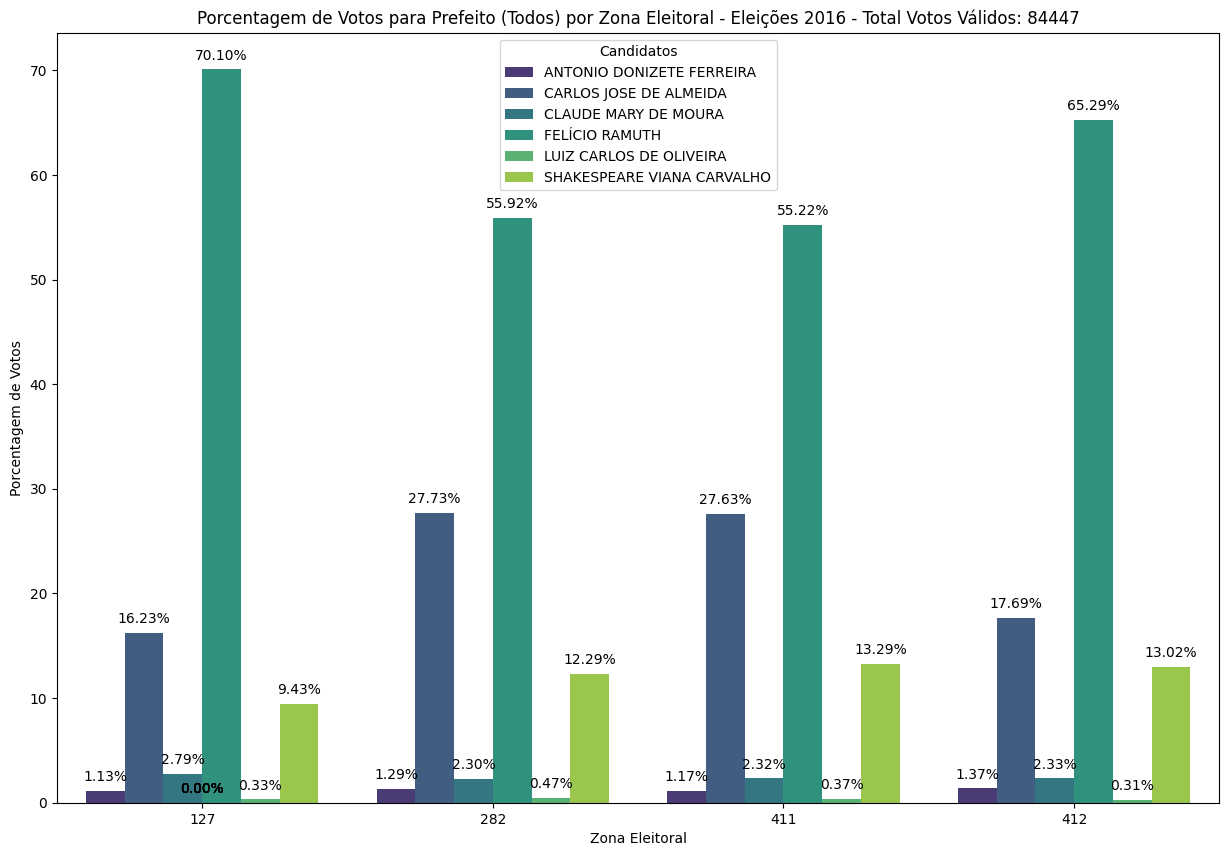

In [58]:
dados_agrupados = prefeito2016.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()
total_votos_validos = dados_agrupados.groupby('nr_zona')['qt_votos_nom_validos'].transform('sum')
dados_agrupados['porcentagem'] = (dados_agrupados['qt_votos_nom_validos'] / total_votos_validos) * 100

plt.figure(figsize=(15, 10))

ax = sns.barplot(x='nr_zona', y='porcentagem', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                (x, height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Porcentagem de Votos')
plt.title(f'Porcentagem de Votos para Prefeito (Todos) por Zona Eleitoral - Eleições 2016 - Total Votos Válidos: {total_votos_validos.iloc[0]}')
plt.legend(title='Candidatos', loc='upper center')
plt.show()

In [20]:
vereador2016 = sjc2016.loc[sjc2016['ds_cargo'] == "Vereador"]
vereador2016 = vereador2016.loc[vereador2016['ds_sit_totalizacao'] == "Eleito"]

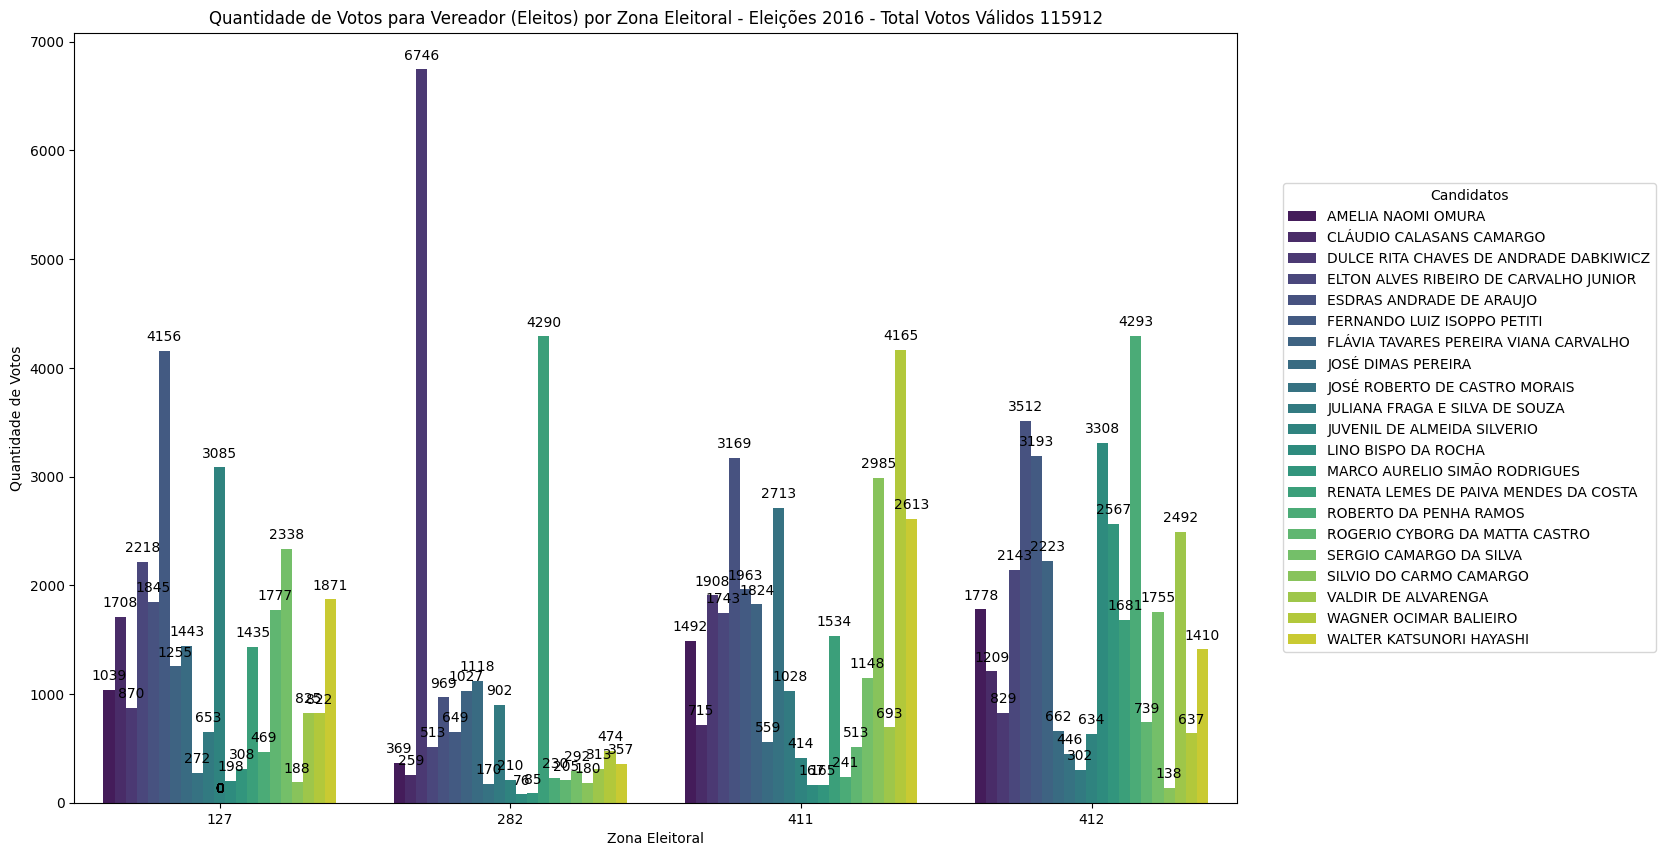

In [21]:
dados_agrupados = vereador2016.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()

total_votos_validos = dados_agrupados['qt_votos_nom_validos'].sum()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_votos_nom_validos', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Votos')
plt.title(f'Quantidade de Votos para Vereador (Eleitos) por Zona Eleitoral - Eleições 2016 - Total Votos Válidos {total_votos_validos}')
plt.legend(title='Candidatos', loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

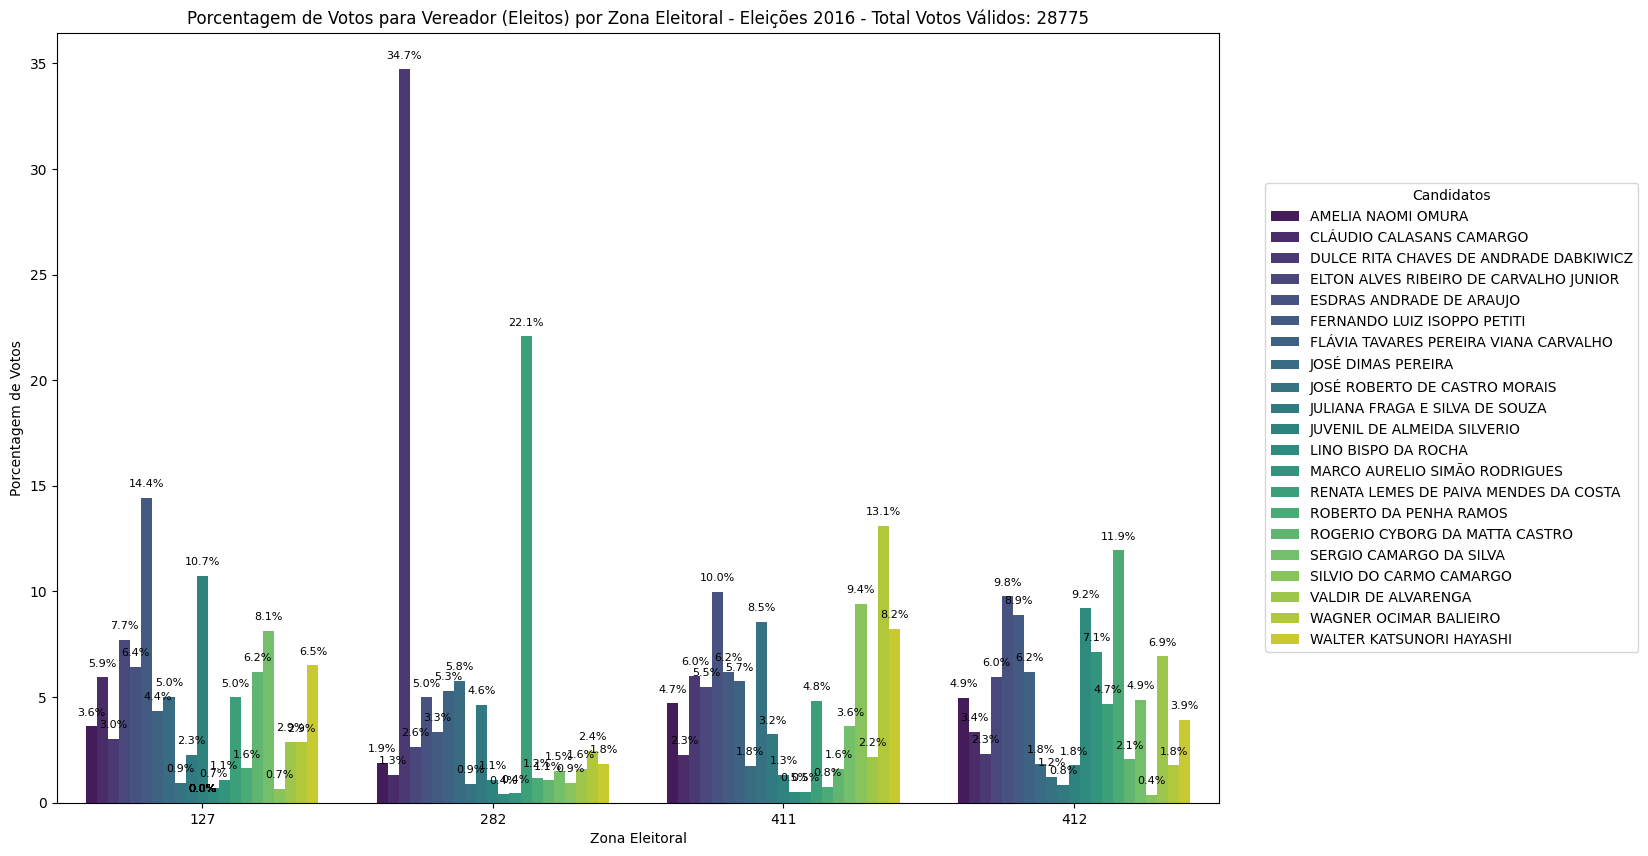

In [60]:
dados_agrupados = vereador2016.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()
total_votos_validos = dados_agrupados.groupby('nr_zona')['qt_votos_nom_validos'].transform('sum')
dados_agrupados['porcentagem'] = (dados_agrupados['qt_votos_nom_validos'] / total_votos_validos) * 100

plt.figure(figsize=(15, 10))

ax = sns.barplot(x='nr_zona', y='porcentagem', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (x, height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Porcentagem de Votos')
plt.title(f'Porcentagem de Votos para Vereador (Eleitos) por Zona Eleitoral - Eleições 2016 - Total Votos Válidos: {total_votos_validos.iloc[0]}')
plt.legend(title='Candidatos', loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

### Resultados Eleições Municipais 2012 em São José dos Campos

In [22]:
sjc2012 = pd.read_csv('../data/votacao_candidato-zona_2012_sp_sao_jose_dos_campos.csv', low_memory=False, delimiter=';',encoding='latin-1')
prefeito2012 = sjc2012.loc[sjc2012['ds_cargo'] == "Prefeito"]
prefeito2012

,sg_uf,nr_zona,nm_municipio,cd_cargo,ds_cargo,nr_candidato,nm_candidato,nm_urna_candidato,sg_partido,ds_composicao_coligacao,nr_turno,ds_sit_totalizacao,dt_ult_totalizacao,sg_ue,sq_candidato,nm_tipo_destinacao_votos,sq_eleicao_divulga,pc_votos_validos,qt_votos_nom_validos,qt_votos_concorrentes
0,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,45,ALEXANDRE BLANCO NEMA,ALEXANDRE BLANCO,PSDB,PP / PDT / PTN / PPS / DEM / PHS / PMN / PRP /...,1,Não Eleito,2012-10-07 22:50:29,70998,250000022520,NaN,1699,NaN,43386,NaN
1,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,13,CARLOS JOSE DE ALMEIDA,CARLINHOS ALMEIDA,PT,PRB / PT / PMDB / PSC / PR / PTC / PC do B,1,Eleito,2012-10-07 22:50:29,70998,250000087197,NaN,1699,NaN,34861,NaN
2,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,43,CRISTIANO PINTO FERREIRA,CRISTIANO,PV,PSL / PV,1,Não Eleito,2012-10-07 22:50:29,70998,250000084106,NaN,1699,NaN,2074,NaN
3,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,40,ANTONIO BAKLOS ALWAN,ANTONIO ALWAN,PSB,PTB / PSB,1,Não Eleito,2012-10-07 22:50:29,70998,250000087766,NaN,1699,NaN,1393,NaN
4,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,27,FABRÍCIO ALBERTO CORREIA,FABRICIO CORREIA,PSDC,PSDC / PRTB,1,Não Eleito,2012-10-07 22:50:29,70998,250000038014,NaN,1699,NaN,772,NaN
5,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,16,ERNESTO GRADELLA NETO,GRADELLA,PSTU,PSTU,1,Não Eleito,2012-10-07 22:50:29,70998,250000078367,NaN,1699,NaN,588,NaN
6,SP,127,SÃO JOSÉ DOS CAMPOS,11,Prefeito,50,ANTONIO GILBERTO SILVÉRIO,GILBERTO SILVÉRIO,PSOL,PSOL,1,Não Eleito,2012-10-07 22:50:29,70998,250000041078,NaN,1699,NaN,222,NaN
458,SP,282,SÃO JOSÉ DOS CAMPOS,11,Prefeito,13,CARLOS JOSE DE ALMEIDA,CARLINHOS ALMEIDA,PT,PRB / PT / PMDB / PSC / PR / PTC / PC do B,1,Eleito,2012-10-07 22:50:29,70998,250000087197,NaN,1699,NaN,35409,NaN
459,SP,282,SÃO JOSÉ DOS CAMPOS,11,Prefeito,45,ALEXANDRE BLANCO NEMA,ALEXANDRE BLANCO,PSDB,PP / PDT / PTN / PPS / DEM / PHS / PMN / PRP /...,1,Não Eleito,2012-10-07 22:50:29,70998,250000022520,NaN,1699,NaN,19326,NaN
460,SP,282,SÃO JOSÉ DOS CAMPOS,11,Prefeito,43,CRISTIANO PINTO FERREIRA,CRISTIANO,PV,PSL / PV,1,Não Eleito,2012-10-07 22:50:29,70998,250000084106,NaN,1699,NaN,1120,NaN


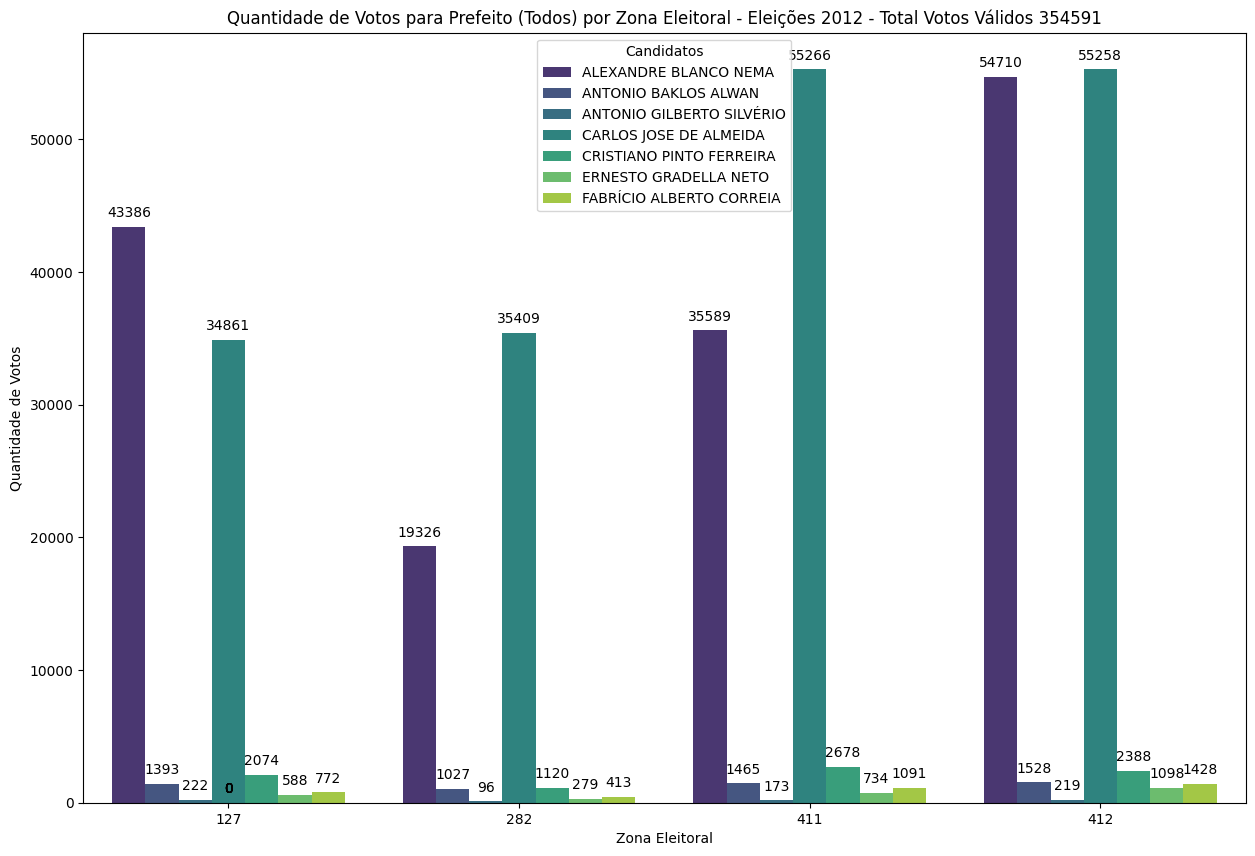

In [23]:
dados_agrupados = prefeito2012.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()

total_votos_validos = dados_agrupados['qt_votos_nom_validos'].sum()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_votos_nom_validos', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Votos')
plt.title(f'Quantidade de Votos para Prefeito (Todos) por Zona Eleitoral - Eleições 2012 - Total Votos Válidos {total_votos_validos}')
plt.legend(title='Candidatos', loc='upper center')
plt.show()

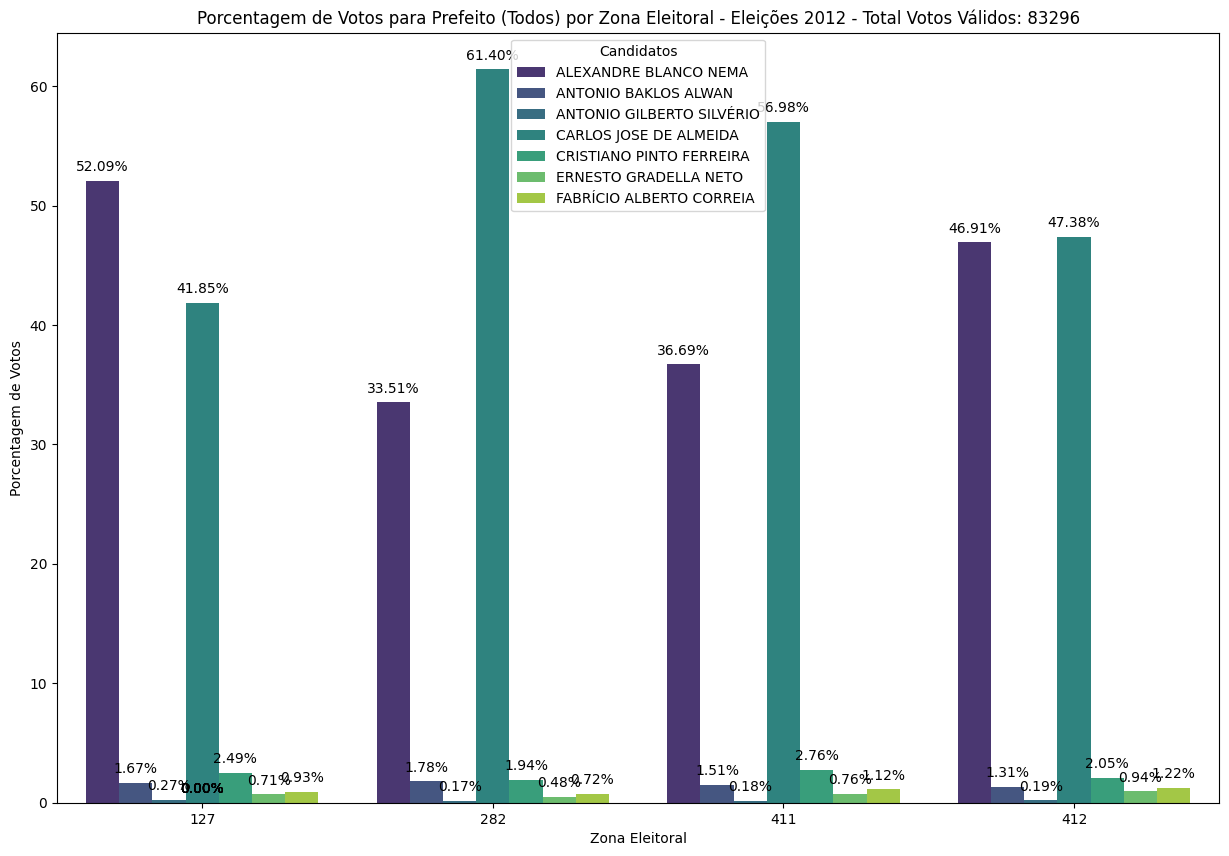

In [61]:
dados_agrupados = prefeito2012.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()
total_votos_validos = dados_agrupados.groupby('nr_zona')['qt_votos_nom_validos'].transform('sum')
dados_agrupados['porcentagem'] = (dados_agrupados['qt_votos_nom_validos'] / total_votos_validos) * 100

plt.figure(figsize=(15, 10))

ax = sns.barplot(x='nr_zona', y='porcentagem', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                (x, height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Porcentagem de Votos')
plt.title(f'Porcentagem de Votos para Prefeito (Todos) por Zona Eleitoral - Eleições 2012 - Total Votos Válidos: {total_votos_validos.iloc[0]}')
plt.legend(title='Candidatos', loc='upper center')
plt.show()

In [24]:
vereador2012 = sjc2012.loc[sjc2012['ds_cargo'] == "Vereador"]
vereador2012 = vereador2012.loc[vereador2012['ds_sit_totalizacao'] == "Eleito"]

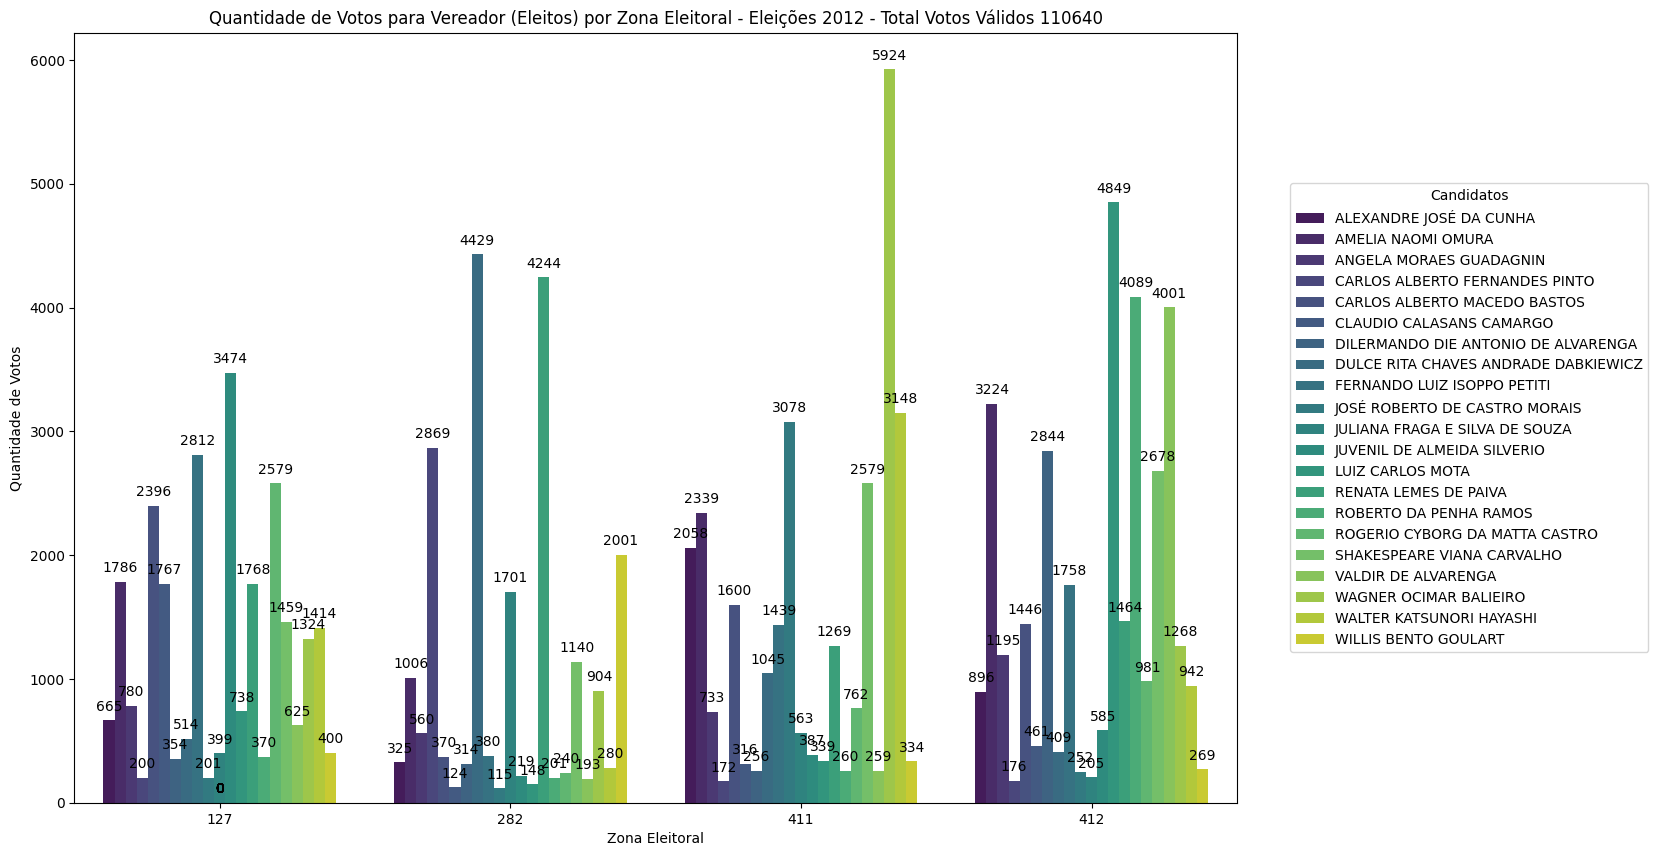

In [25]:
dados_agrupados = vereador2012.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()

total_votos_validos = dados_agrupados['qt_votos_nom_validos'].sum()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_votos_nom_validos', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Votos')
plt.title(f'Quantidade de Votos para Vereador (Eleitos) por Zona Eleitoral - Eleições 2012 - Total Votos Válidos {total_votos_validos}')
plt.legend(title='Candidatos', loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

In [ ]:
dados_agrupados = vereador2012.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()
total_votos_validos = dados_agrupados.groupby('nr_zona')['qt_votos_nom_validos'].transform('sum')
dados_agrupados['porcentagem'] = (dados_agrupados['qt_votos_nom_validos'] / total_votos_validos) * 100

plt.figure(figsize=(15, 10))

ax = sns.barplot(x='nr_zona', y='porcentagem', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (x, height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Porcentagem de Votos')
plt.title(f'Porcentagem de Votos para Vereador (Eleitos) por Zona Eleitoral - Eleições 2016 - Total Votos Válidos: {total_votos_validos.iloc[0]}')
plt.legend(title='Candidatos', loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

### Resultados Eleições Deputado Estadaual 2022 em São José dos Campos

In [26]:
elicoes2022 = pd.read_csv('../data/votacao_candidato-zona_2022_sp_sao_jose_dos_campos.csv', low_memory=False, delimiter=';',encoding='latin-1')
dep_estadual_2022 = elicoes2022.loc[elicoes2022['ds_cargo'] == "Deputado Estadual"]
#dep_estadual_2022 = dep_estadual_2022.loc[dep_estadual_2022['ds_sit_totalizacao'] == "Eleito"]

selecao_estadual = ['ELTON ALVES RIBEIRO DE CARVALHO JUNIOR']
dep_estadual_2022 = dep_estadual_2022[dep_estadual_2022['nm_candidato'].isin(selecao_estadual)]     

dep_estadual_2022

,sg_uf,nr_zona,cd_cargo,ds_cargo,nr_candidato,nm_candidato,nm_urna_candidato,sg_partido,ds_composicao_coligacao,nr_turno,ds_sit_totalizacao,dt_ult_totalizacao,sg_ue,sq_candidato,nm_tipo_destinacao_votos,sq_eleicao_divulga,pc_votos_validos,qt_votos_nom_validos,qt_votos_concorrentes
1461,SP,127,7,Deputado Estadual,20012,ELTON ALVES RIBEIRO DE CARVALHO JUNIOR,"DR, ELTON",PSC,PSC,1,Eleito,2023-04-10 14:20:54,SP,250001643810,Válido,2040602022,"0,092",9581,104123
4847,SP,282,7,Deputado Estadual,20012,ELTON ALVES RIBEIRO DE CARVALHO JUNIOR,"DR, ELTON",PSC,PSC,1,Eleito,2023-04-10 14:20:54,SP,250001643810,Válido,2040602022,"0,0662",3853,58243
8232,SP,411,7,Deputado Estadual,20012,ELTON ALVES RIBEIRO DE CARVALHO JUNIOR,"DR, ELTON",PSC,PSC,1,Eleito,2023-04-10 14:20:54,SP,250001643810,Válido,2040602022,"0,0874",8930,102142
11616,SP,412,7,Deputado Estadual,20012,ELTON ALVES RIBEIRO DE CARVALHO JUNIOR,"DR, ELTON",PSC,PSC,1,Eleito,2023-04-10 14:20:54,SP,250001643810,Válido,2040602022,"0,0993",13265,133606


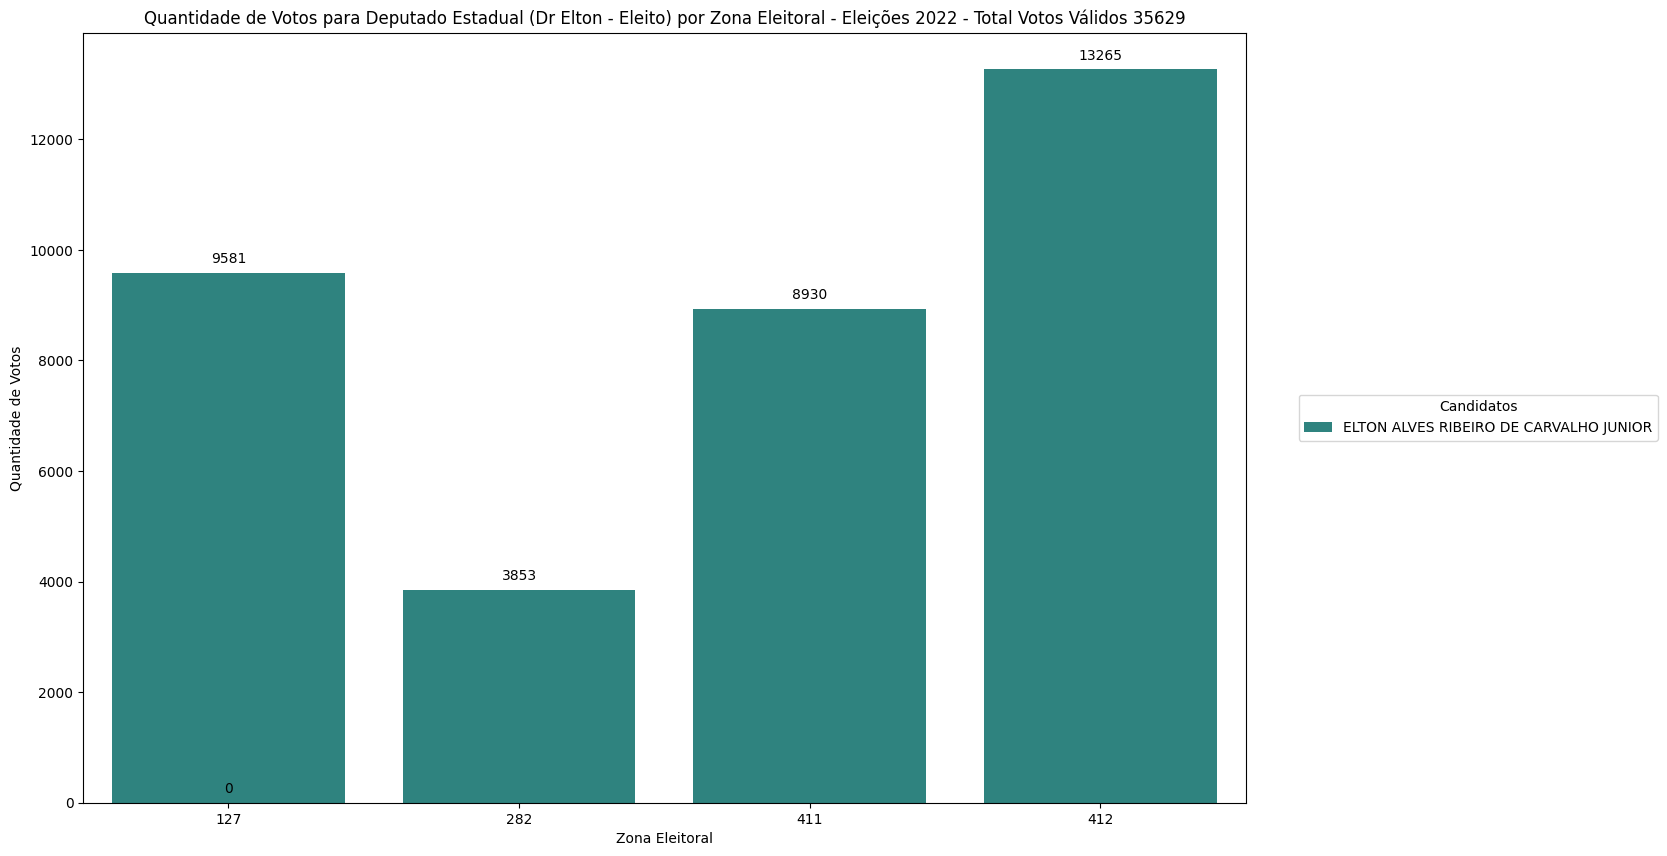

In [27]:
dados_agrupados = dep_estadual_2022.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()

total_votos_validos = dados_agrupados['qt_votos_nom_validos'].sum()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_votos_nom_validos', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Votos')
plt.title(f'Quantidade de Votos para Deputado Estadual (Dr Elton - Eleito) por Zona Eleitoral - Eleições 2022 - Total Votos Válidos {total_votos_validos}')
plt.legend(title='Candidatos', loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

### Resultados Eleições Deputado Federal 2022 em São José dos Campos

In [28]:
dep_federal_2022 = elicoes2022.loc[elicoes2022['ds_cargo'] == "Deputado Federal"]
#dep_federal_2022 = dep_federal_2022.loc[dep_federal_2022['ds_sit_totalizacao'] == "Eleito"]

selecao_federal = ['EDUARDO PEDROSA CURY']
dep_federal_2022 = dep_federal_2022[dep_federal_2022['nm_candidato'].isin(selecao_federal)]   

dep_federal_2022

,sg_uf,nr_zona,cd_cargo,ds_cargo,nr_candidato,nm_candidato,nm_urna_candidato,sg_partido,ds_composicao_coligacao,nr_turno,ds_sit_totalizacao,dt_ult_totalizacao,sg_ue,sq_candidato,nm_tipo_destinacao_votos,sq_eleicao_divulga,pc_votos_validos,qt_votos_nom_validos,qt_votos_concorrentes
32,SP,127,6,Deputado Federal,4515,EDUARDO PEDROSA CURY,EDUARDO CURY,PSDB,CIDADANIA / PSDB,1,Suplente,2023-04-10 14:20:54,SP,250001612109,Válido,2040602022,"0,1361",14355,105484
3417,SP,282,6,Deputado Federal,4515,EDUARDO PEDROSA CURY,EDUARDO CURY,PSDB,CIDADANIA / PSDB,1,Suplente,2023-04-10 14:20:54,SP,250001612109,Válido,2040602022,"0,1652",9635,58336
6803,SP,411,6,Deputado Federal,4515,EDUARDO PEDROSA CURY,EDUARDO CURY,PSDB,CIDADANIA / PSDB,1,Suplente,2023-04-10 14:20:54,SP,250001612109,Válido,2040602022,"0,1298",13468,103780
10187,SP,412,6,Deputado Federal,4515,EDUARDO PEDROSA CURY,EDUARDO CURY,PSDB,CIDADANIA / PSDB,1,Suplente,2023-04-10 14:20:54,SP,250001612109,Válido,2040602022,"0,1531",20885,136413


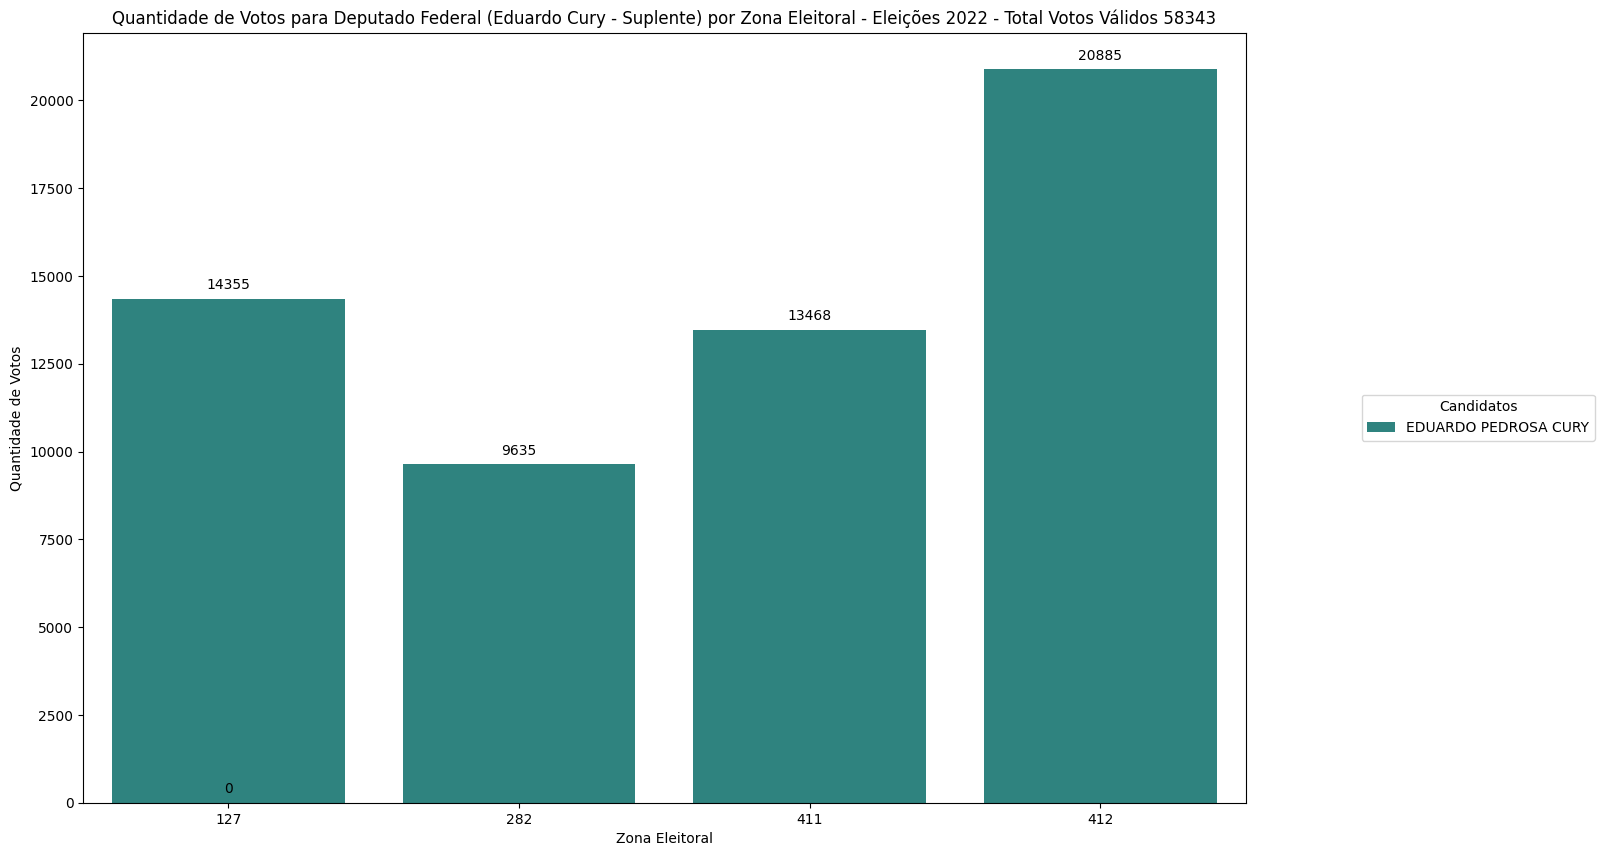

In [29]:
dados_agrupados = dep_federal_2022.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()

total_votos_validos = dados_agrupados['qt_votos_nom_validos'].sum()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_votos_nom_validos', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Votos')
plt.title(f'Quantidade de Votos para Deputado Federal (Eduardo Cury - Suplente) por Zona Eleitoral - Eleições 2022 - Total Votos Válidos {total_votos_validos}')
plt.legend(title='Candidatos', loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

### Resultados Eleições Deputado Federal 2018 em São José dos Campos

In [30]:
elicoes2018 = pd.read_csv('../data/votacao_candidato-zona_2018_sp_sao_jose_dos_campos.csv', low_memory=False, delimiter=';',encoding='latin-1')
dep_federal_2018 = elicoes2018.loc[elicoes2018['ds_cargo'] == "Deputado Federal"]
#dep_federal_2018 = dep_federal_2018.loc[dep_federal_2018['ds_sit_totalizacao'] == "Eleito"]

selecao_federal = ['EDUARDO PEDROSA CURY']
dep_federal_2018 = dep_federal_2018[dep_federal_2018['nm_candidato'].isin(selecao_federal)]     

dep_federal_2018

,sg_uf,nr_zona,cd_cargo,ds_cargo,nr_candidato,nm_candidato,nm_urna_candidato,sg_partido,ds_composicao_coligacao,nr_turno,ds_sit_totalizacao,dt_ult_totalizacao,sg_ue,sq_candidato,nm_tipo_destinacao_votos,sq_eleicao_divulga,pc_votos_validos,qt_votos_nom_validos,qt_votos_concorrentes
40,SP,127,6,Deputado Federal,4515,EDUARDO PEDROSA CURY,EDUARDO CURY,PSDB,PSDB / PSD / DEM / PP,1,Eleito,2020-07-09 16:46:40,SP,250000605427,Válido,2022802018,"0,1762",16151,91656
3522,SP,282,6,Deputado Federal,4515,EDUARDO PEDROSA CURY,EDUARDO CURY,PSDB,PSDB / PSD / DEM / PP,1,Eleito,2020-07-09 16:46:40,SP,250000605427,Válido,2022802018,"0,1615",8772,54320
7004,SP,411,6,Deputado Federal,4515,EDUARDO PEDROSA CURY,EDUARDO CURY,PSDB,PSDB / PSD / DEM / PP,1,Eleito,2020-07-09 16:46:40,SP,250000605427,Válido,2022802018,"0,1354",12832,94756
10486,SP,412,6,Deputado Federal,4515,EDUARDO PEDROSA CURY,EDUARDO CURY,PSDB,PSDB / PSD / DEM / PP,1,Eleito,2020-07-09 16:46:40,SP,250000605427,Válido,2022802018,"0,1679",20332,121093


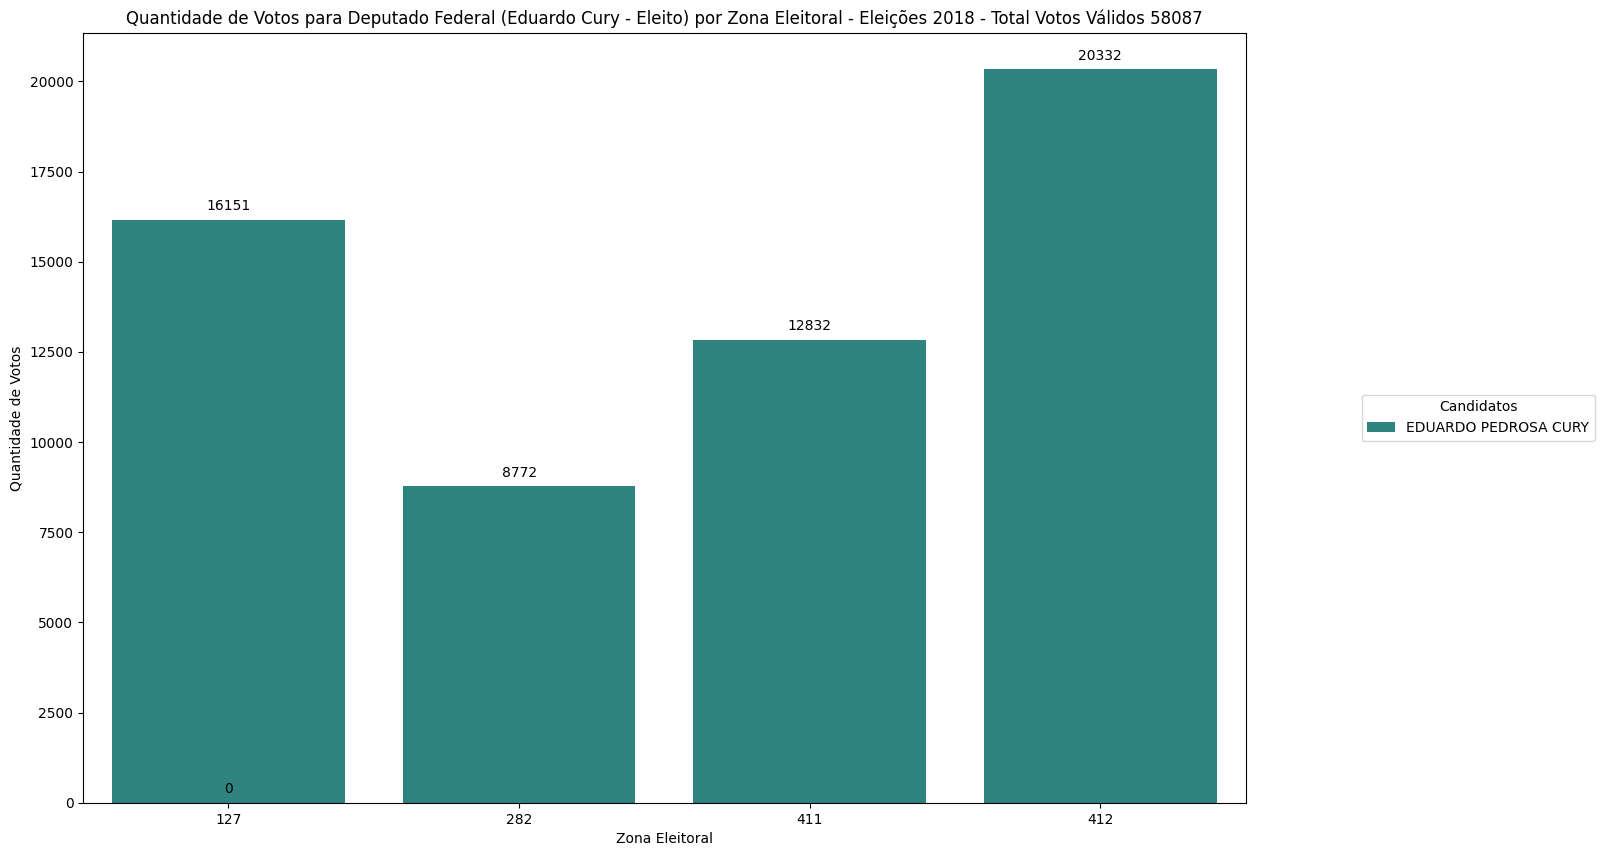

In [31]:
dados_agrupados = dep_federal_2018.groupby(['nr_zona', 'nm_candidato'])['qt_votos_nom_validos'].sum().reset_index()

total_votos_validos = dados_agrupados['qt_votos_nom_validos'].sum()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='nr_zona', y='qt_votos_nom_validos', hue='nm_candidato', data=dados_agrupados, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Zona Eleitoral')
plt.ylabel('Quantidade de Votos')
plt.title(f'Quantidade de Votos para Deputado Federal (Eduardo Cury - Eleito) por Zona Eleitoral - Eleições 2018 - Total Votos Válidos {total_votos_validos}')
plt.legend(title='Candidatos', loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

## Resultados das eleições por seção - Presidente 2022

In [32]:
secao2022 = pd.read_csv('../data/votacao_secao-uf_2022_sudeste_sp_sao_jose_dos_campos.csv', low_memory=False, delimiter=';',encoding='latin-1')

secoes2022presidente = secao2022[['nr_zona','nr_secao', 'nm_local_votacao', 'ds_local_votacao_endereco', 'nm_votavel', 'qt_votos']]
secoes2022presidente = secoes2022presidente.sort_values(by=['nr_zona', 'nr_secao'])
secoes2022presidente

,nr_zona,nr_secao,nm_local_votacao,ds_local_votacao_endereco,nm_votavel,qt_votos
2366,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",VOTO BRANCO,7
2376,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",LUIZ INÁCIO LULA DA SILVA,69
2660,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",VOTO NULO,8
3103,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",JAIR MESSIAS BOLSONARO,147
2887,127,2,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",JAIR MESSIAS BOLSONARO,88
...,...,...,...,...,...,...
4260,412,495,"CEPHAS - CENTRO DE EDUC, PROFISSIONAL HELIO AU...","RUA TSUNESSABURO MAKIGUTI, 399",VOTO NULO,5
1273,412,496,"CEPHAS - CENTRO DE EDUC, PROFISSIONAL HELIO AU...","RUA TSUNESSABURO MAKIGUTI, 399",VOTO NULO,8
1416,412,496,"CEPHAS - CENTRO DE EDUC, PROFISSIONAL HELIO AU...","RUA TSUNESSABURO MAKIGUTI, 399",VOTO BRANCO,4
1730,412,496,"CEPHAS - CENTRO DE EDUC, PROFISSIONAL HELIO AU...","RUA TSUNESSABURO MAKIGUTI, 399",JAIR MESSIAS BOLSONARO,86


In [33]:
caminho_saida_csv = '../export/sesecoes2022presidente.csv'
secoes2022presidente.to_csv(caminho_saida_csv, index=False)

## Resultados das eleições por seção - Prefeitos 2020

In [34]:
secao2020 = pd.read_csv('../data/votacao_secao-municipio_2020_sudeste_sp_sao_jose_dos_campos.csv', low_memory=False, delimiter=';',encoding='latin-1')

secoes2020prefeito = secao2020[['nr_zona','nr_secao', 'nm_local_votacao', 'ds_local_votacao_endereco', 'nm_votavel', 'qt_votos']]
secoes2020prefeito = secoes2020prefeito.sort_values(by=['nr_zona', 'nr_secao'])
secoes2020prefeito



,nr_zona,nr_secao,nm_local_votacao,ds_local_votacao_endereco,nm_votavel,qt_votos
536,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",VOTO NULO,12
854,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",CONSTANTINO CURY NETO,1
2333,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",LUIZ CARLOS DE OLIVEIRA,3
2679,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",WAGNER OCIMAR BALIEIRO,19
4144,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",ANDERSON ALVES SENE,10
...,...,...,...,...,...,...
10386,412,490,EE PROFA MALBA THEREZA FERRAZ CAMPANER,"PRAÇA MIKADO, 142",ELIANE NIKOLUK SCACHETTI,34
10784,412,490,EE PROFA MALBA THEREZA FERRAZ CAMPANER,"PRAÇA MIKADO, 142",VOTO NULO,13
10882,412,490,EE PROFA MALBA THEREZA FERRAZ CAMPANER,"PRAÇA MIKADO, 142",FELICIO RAMUTH,165
10883,412,490,EE PROFA MALBA THEREZA FERRAZ CAMPANER,"PRAÇA MIKADO, 142",WAGNER OCIMAR BALIEIRO,15


In [35]:
caminho_saida_csv = '../export/sesecoes2020prefeito.csv'
secoes2020prefeito.to_csv(caminho_saida_csv, index=False)

## Resultados das eleições por seção - Prefeitos 2016

In [36]:
secao2016 = pd.read_csv('../data/votacao_secao-municipio_2016_sudeste_sp_sao_jose_dos_campos.csv', low_memory=False, delimiter=';',encoding='latin-1')

secoes2016prefeito = secao2016[['nr_zona','nr_secao', 'nm_local_votacao', 'ds_local_votacao_endereco', 'nm_votavel', 'qt_votos']]
secoes2016prefeito = secoes2016prefeito.sort_values(by=['nr_zona', 'nr_secao'])
secoes2016prefeito

,nr_zona,nr_secao,nm_local_votacao,ds_local_votacao_endereco,nm_votavel,qt_votos
1259,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",LUIZ CARLOS DE OLIVEIRA,1
4717,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",VOTO BRANCO,4
5263,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",FELÍCIO RAMUTH,141
6891,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",ANTONIO DONIZETE FERREIRA,3
7148,127,1,"EE, OLÍMPIO CATÃO","PRAÇA AFONSO PENA, 364",CLAUDE MARY DE MOURA,6
...,...,...,...,...,...,...
1335,412,426,"EMEF, PROFA, RUTH NUNES DA TRINDADE","RUA WALDEMAR TEIXEIRA, 900",SHAKESPEARE VIANA CARVALHO,14
3089,412,426,"EMEF, PROFA, RUTH NUNES DA TRINDADE","RUA WALDEMAR TEIXEIRA, 900",CARLOS JOSE DE ALMEIDA,8
6719,412,426,"EMEF, PROFA, RUTH NUNES DA TRINDADE","RUA WALDEMAR TEIXEIRA, 900",VOTO BRANCO,7
8311,412,426,"EMEF, PROFA, RUTH NUNES DA TRINDADE","RUA WALDEMAR TEIXEIRA, 900",CLAUDE MARY DE MOURA,1


In [37]:
caminho_saida_csv = '../export/sesecoes2016prefeito.csv'
secoes2016prefeito.to_csv(caminho_saida_csv, index=False)

## Resultados das eleições por seção - Prefeitos 2012

In [38]:
secao2012 = pd.read_csv('../data/votacao_secao-municipio_2012_sudeste_sp_sao_jose_dos_campos.csv', low_memory=False, delimiter=';',encoding='latin-1')

secoes2012prefeito = secao2012[['nr_zona','nr_secao', 'nm_local_votacao', 'ds_local_votacao_endereco', 'nm_votavel', 'qt_votos']]
secoes2012prefeito = secoes2012prefeito.sort_values(by=['nr_zona', 'nr_secao'])
secoes2012prefeito

,nr_zona,nr_secao,nm_local_votacao,ds_local_votacao_endereco,nm_votavel,qt_votos
1463,127,1,EE OLIMPIO CATAO,"PRACA AFONSO PENA , 364",VOTO NULO,9
1805,127,1,EE OLIMPIO CATAO,"PRACA AFONSO PENA , 364",ALEXANDRE BLANCO NEMA,121
3605,127,1,EE OLIMPIO CATAO,"PRACA AFONSO PENA , 364",ANTONIO GILBERTO SILVÉRIO,2
4678,127,1,EE OLIMPIO CATAO,"PRACA AFONSO PENA , 364",ERNESTO GRADELLA NETO,2
6129,127,1,EE OLIMPIO CATAO,"PRACA AFONSO PENA , 364",CRISTIANO PINTO FERREIRA,7
...,...,...,...,...,...,...
5269,412,378,EMEF PROFA MERCEDES CARNEVALLI KLEIN,"AVENIDA CASSIOPÉIA , 425",CARLOS JOSE DE ALMEIDA,61
5286,412,378,EMEF PROFA MERCEDES CARNEVALLI KLEIN,"AVENIDA CASSIOPÉIA , 425",FABRÍCIO ALBERTO CORREIA,3
6540,412,378,EMEF PROFA MERCEDES CARNEVALLI KLEIN,"AVENIDA CASSIOPÉIA , 425",VOTO NULO,1
8469,412,378,EMEF PROFA MERCEDES CARNEVALLI KLEIN,"AVENIDA CASSIOPÉIA , 425",VOTO BRANCO,4


In [39]:
caminho_saida_csv = '../export/sesecoes2012prefeito.csv'
secoes2012prefeito.to_csv(caminho_saida_csv, index=False)